## System Setup

In [1]:
!pip install yfinance

In [2]:
!pip install tensorflow

In [3]:
import datetime as dt
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

## Set up weighted portfolio

In [4]:
supply_chain_symbols = []
weights = np.array([20, 20, 20, 20, 20]) / 100
data = []

## Downloading data

In [5]:
import yfinance as yf
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Industry ticker list
supply_symbols = ['FDX', 'UPS', 'XPO', 'AMKBY', 'CSX']
insurance_symbols = ['PGR', 'TRV', 'RLI', 'ERIE', 'CB']
automotive_symbols = ['GM', 'TM', 'VOW3.DE', 'F', 'RACE', 'TSLA']
misc_symbols = ['CL=F', 'LKQ', 'MGA', 'NXPI', 'IFX.DE', 'MGA', 'KMX']
# Fetch the data
supply_data = yf.download(supply_symbols,period="1y")['Adj Close']
insurance_data = yf.download(insurance_symbols,period="1y")['Adj Close']
automotive_data = yf.download(automotive_symbols,period="1y")['Adj Close']
misc_data = yf.download(misc_symbols,period="1y")['Adj Close']

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed


## Calculate returns

In [7]:
returns_supply = np.log(supply_data).diff()
returns_supply.dropna(inplace = True)

returns_insurance = np.log(insurance_data).diff()
returns_insurance.dropna(inplace = True)

returns_automotive = np.log(automotive_data).diff()
returns_automotive.dropna(inplace = True)

returns_misc = np.log(misc_data).diff()
returns_misc.dropna(inplace = True)

print(returns_supply.head())
print(returns_insurance.head())
print(returns_automotive.head())
print(returns_misc.head())

               AMKBY       CSX       FDX       UPS       XPO
Date                                                        
2021-12-06 -0.007874  0.025346  0.017330  0.006604  0.025223
2021-12-07  0.028573  0.008937  0.008169  0.016346  0.049370
2021-12-08  0.036459 -0.003782 -0.009394 -0.003267 -0.007468
2021-12-09  0.006154 -0.009244  0.002041  0.008851  0.007846
2021-12-10 -0.007389  0.003545  0.007254  0.012366 -0.046574
                  CB      ERIE       PGR       RLI       TRV
Date                                                        
2021-12-06  0.032904  0.043600  0.016354  0.026603  0.017676
2021-12-07  0.002716  0.012609  0.000207  0.004939  0.008330
2021-12-08  0.005939  0.005912 -0.017611  0.002321  0.003847
2021-12-09  0.005483 -0.027755  0.001366 -0.001021  0.004506
2021-12-10  0.006655  0.021636 -0.001997  0.027381  0.004939
                   F        GM      RACE        TM      TSLA   VOW3.DE
Date                                                                  
2021

In [8]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Supply Chain Returns Plot

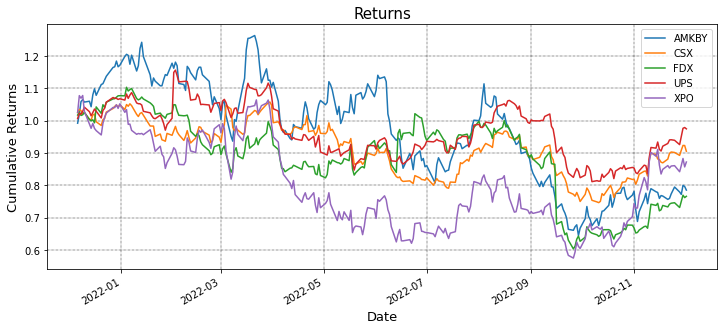

In [9]:
# Plot all the adjusted close prices
((supply_data.pct_change()+1).cumprod()).plot(figsize=(12, 5))

# Add legend
plt.legend()

# Name Graph
plt.title("Returns", fontsize=15)

# Define the labels for axis
plt.ylabel('Cumulative Returns', fontsize=13)
plt.xlabel('Date', fontsize=13)

# Plot the lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.4)
plt.show()

## Insurance Returns Plot

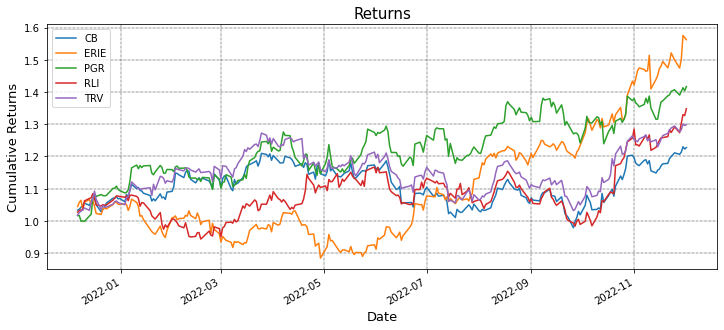

In [10]:
# Plot all the adjusted close prices
((insurance_data.pct_change()+1).cumprod()).plot(figsize=(12, 5))

# Add legend
plt.legend()

# Name Graph
plt.title("Returns", fontsize=15)

# Define the labels for axis
plt.ylabel('Cumulative Returns', fontsize=13)
plt.xlabel('Date', fontsize=13)

# Plot the lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.4)
plt.show()

## Automotive Returns Plot

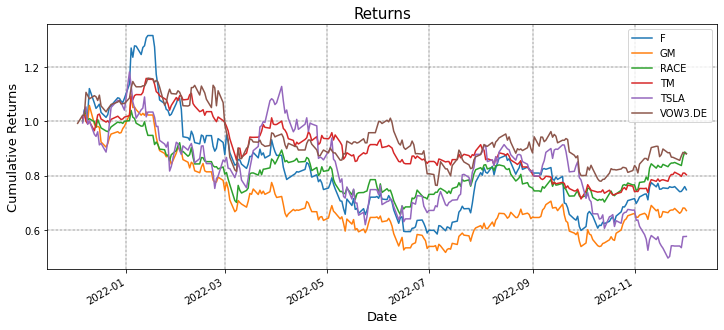

In [11]:
# Plot all the adjusted close prices
((automotive_data.pct_change()+1).cumprod()).plot(figsize=(12, 5))

# Add legend
plt.legend()

# Name Graph
plt.title("Returns", fontsize=15)

# Define the labels for axis
plt.ylabel('Cumulative Returns', fontsize=13)
plt.xlabel('Date', fontsize=13)

# Plot the lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.4)
plt.show()

## Miscellaneous Returns Plot

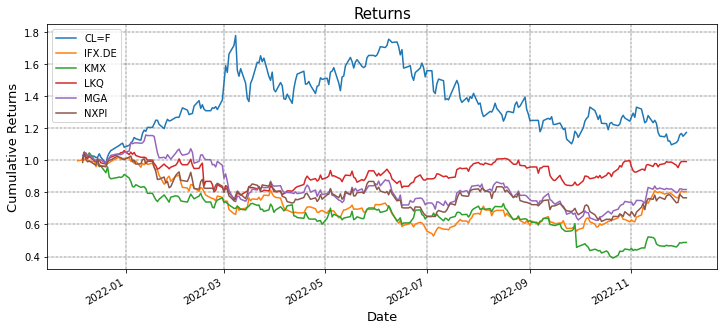

In [12]:
# Plot all the adjusted close prices
((misc_data.pct_change()+1).cumprod()).plot(figsize=(12, 5))

# Add legend
plt.legend()

# Name Graph
plt.title("Returns", fontsize=15)

# Define the labels for axis
plt.ylabel('Cumulative Returns', fontsize=13)
plt.xlabel('Date', fontsize=13)

# Plot the lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.4)
plt.show()

## Printing the Size of datasets

In [13]:
#print('There are {} records in training dataset'.format(len(train_data_amkby)))
#print('There are {} records in validation dataset'.format(len(validation_amkby)))
#print('There are {} records in the dataset'.format(len(supply_data['AMKBY'])))

## Creating Models on Supply Chain Stocks

In [14]:
supply_prices_amkby = supply_data.filter(['AMKBY'])
values_amkby = supply_prices_amkby.values
training_data_len_amkby = math.ceil(len(values_amkby)* 0.8)

scaler_amkby = MinMaxScaler(feature_range=(0,1))
scaled_data_amkby = scaler_amkby.fit_transform(values_amkby.reshape(-1,1))
train_data_amkby = scaled_data_amkby[0: training_data_len_amkby, :]

x_train_amkby = []
y_train_amkby = []

for i in range(60, len(train_data_amkby)):
    x_train_amkby.append(train_data_amkby[i-60:i, 0])
    y_train_amkby.append(train_data_amkby[i, 0])
    
x_train_amkby, y_train_amkby = np.array(x_train_amkby), np.array(y_train_amkby)
x_train_amkby = np.reshape(x_train_amkby, (x_train_amkby.shape[0], x_train_amkby.shape[1], 1))

In [15]:
test_data_amkby = scaled_data_amkby[training_data_len_amkby-60: , : ]
x_test_amkby = []
y_test_amkby = values_amkby[training_data_len_amkby:]

for i in range(60, len(test_data_amkby)):
    x_test_amkby.append(test_data_amkby[i-60:i, 0])

x_test_amkby = np.array(x_test_amkby)
x_test_amkby = np.reshape(x_test_amkby, (x_test_amkby.shape[0], x_test_amkby.shape[1], 1))

In [16]:
model_amkby = keras.Sequential()
model_amkby.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_amkby.shape[1], 1)))
model_amkby.add(layers.LSTM(100, return_sequences=False))
model_amkby.add(layers.Dense(25))
model_amkby.add(layers.Dense(1))
model_amkby.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_amkby.compile(optimizer='adam', loss='mean_squared_error')
model_amkby.fit(x_train_amkby, y_train_amkby, batch_size= 1, epochs=3)

Epoch 1/3
142/142 [==============================] - 13s 46ms/step - loss: 0.0264
Epoch 2/3
142/142 [==============================] - 5s 38ms/step - loss: 0.0126
Epoch 3/3
142/142 [==============================] - 4s 30ms/step - loss: 0.0095


In [18]:
predictions_amkby = model_amkby.predict(x_test_amkby)
predictions_amkby = scaler_amkby.inverse_transform(predictions_amkby)

2/2 [==============================] - 4s 54ms/step


In [19]:

rmse_amkby = np.sqrt(np.mean(predictions_amkby - y_test_amkby)**2)
rmse_amkby

0.41066951751708985

C:\Users\jai\AppData\Local\Temp\ipykernel_30944\4158034558.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_amkby['Predictions'] = predictions_amkby


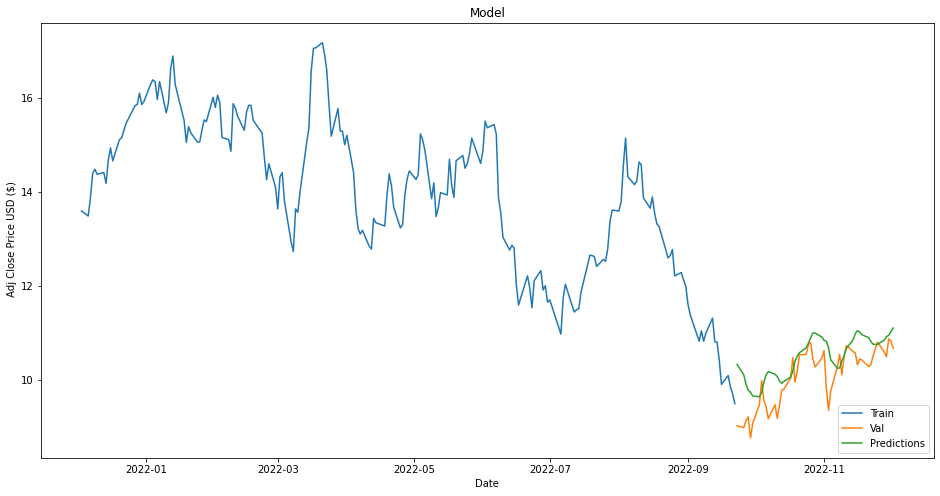

In [20]:
data_amkby = supply_data.filter(['AMKBY'])
train_amkby = data_amkby[:training_data_len_amkby]
validation_amkby = data_amkby[training_data_len_amkby:]
validation_amkby['Predictions'] = predictions_amkby
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel(' Adj Close Price USD ($)')
plt.plot(train_amkby)
plt.plot(validation_amkby)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## 'CSX'

In [21]:
supply_prices_csx = supply_data.filter(['CSX'])
values_csx = supply_prices_csx.values
training_data_len_csx = math.ceil(len(values_csx)* 0.8)

scaler_csx = MinMaxScaler(feature_range=(0,1))
scaled_data_csx = scaler_csx.fit_transform(values_csx.reshape(-1,1))
train_data_csx = scaled_data_csx[0: training_data_len_csx, :]

x_train_csx = []
y_train_csx = []

for i in range(60, len(train_data_csx)):
    x_train_csx.append(train_data_csx[i-60:i, 0])
    y_train_csx.append(train_data_csx[i, 0])
    
x_train_csx, y_train_csx = np.array(x_train_csx), np.array(y_train_csx)
x_train_csx = np.reshape(x_train_csx, (x_train_csx.shape[0], x_train_csx.shape[1], 1))

In [22]:
test_data_csx = scaled_data_csx[training_data_len_csx-60: , : ]
x_test_csx = []
y_test_csx = values_csx[training_data_len_csx:]

for i in range(60, len(test_data_csx)):
    x_test_csx.append(test_data_csx[i-60:i, 0])

x_test_csx = np.array(x_test_csx)
x_test_csx = np.reshape(x_test_csx, (x_test_csx.shape[0], x_test_csx.shape[1], 1))

In [23]:
model_csx = keras.Sequential()
model_csx.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_csx.shape[1], 1)))
model_csx.add(layers.LSTM(100, return_sequences=False))
model_csx.add(layers.Dense(25))
model_csx.add(layers.Dense(1))
model_csx.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [24]:
predictions_csx = model_amkby.predict(x_test_csx)
predictions_csx = scaler_csx.inverse_transform(predictions_csx)

2/2 [==============================] - 0s 25ms/step


In [25]:
model_csx.compile(optimizer='adam', loss='mean_squared_error')
model_csx.fit(x_train_csx, y_train_csx, batch_size= 1, epochs=3)

Epoch 1/3
142/142 [==============================] - 13s 48ms/step - loss: 0.0268
Epoch 2/3
142/142 [==============================] - 5s 34ms/step - loss: 0.0144
Epoch 3/3
142/142 [==============================] - 6s 42ms/step - loss: 0.0120


In [26]:
rmse_csx = np.sqrt(np.mean(predictions_csx - y_test_csx)**2)
rmse_csx

0.3535020065307617

C:\Users\jai\AppData\Local\Temp\ipykernel_30944\1309638002.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_csx['Predictions'] = predictions_csx


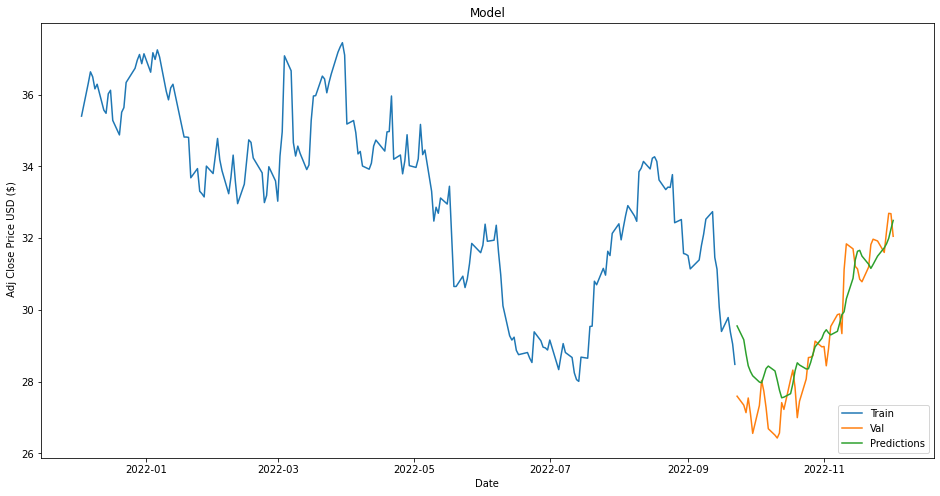

In [27]:
data_csx = supply_data.filter(['CSX'])
train_csx = data_csx[:training_data_len_csx]
validation_csx = data_csx[training_data_len_csx:]
validation_csx['Predictions'] = predictions_csx
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel(' Adj Close Price USD ($)')
plt.plot(train_csx)
plt.plot(validation_csx)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## 'FDX'

In [28]:
supply_prices_fdx = supply_data.filter(['FDX'])
values_fdx = supply_prices_fdx.values
training_data_len_fdx = math.ceil(len(values_fdx)* 0.8)

scaler_fdx = MinMaxScaler(feature_range=(0,1))
scaled_data_fdx = scaler_fdx.fit_transform(values_fdx.reshape(-1,1))
train_data_fdx = scaled_data_fdx[0: training_data_len_fdx, :]

x_train_fdx = []
y_train_fdx = []

for i in range(60, len(train_data_fdx)):
    x_train_fdx.append(train_data_fdx[i-60:i, 0])
    y_train_fdx.append(train_data_fdx[i, 0])
    
x_train_fdx, y_train_fdx = np.array(x_train_fdx), np.array(y_train_fdx)
x_train_fdx = np.reshape(x_train_fdx, (x_train_fdx.shape[0], x_train_fdx.shape[1], 1))

In [29]:
test_data_fdx = scaled_data_fdx[training_data_len_fdx-60: , : ]
x_test_fdx = []
y_test_fdx = values_fdx[training_data_len_fdx:]

for i in range(60, len(test_data_fdx)):
    x_test_fdx.append(test_data_fdx[i-60:i, 0])

x_test_fdx = np.array(x_test_fdx)
x_test_fdx = np.reshape(x_test_fdx, (x_test_fdx.shape[0], x_test_fdx.shape[1], 1))

In [31]:
model_fdx = keras.Sequential()
model_fdx.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_fdx.shape[1], 1)))
model_fdx.add(layers.LSTM(100, return_sequences=False))
model_fdx.add(layers.Dense(25))
model_fdx.add(layers.Dense(1))
model_fdx.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 25)                2525      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_fdx.compile(optimizer='adam', loss='mean_squared_error')
model_fdx.fit(x_train_fdx, y_train_fdx, batch_size= 1, epochs=3)

Epoch 1/3
142/142 [==============================] - 13s 39ms/step - loss: 0.0218
Epoch 2/3
142/142 [==============================] - 7s 49ms/step - loss: 0.0139
Epoch 3/3
142/142 [==============================] - 5s 33ms/step - loss: 0.0094


In [33]:
predictions_fdx= model_fdx.predict(x_test_fdx)
predictions_fdx = scaler_fdx.inverse_transform(predictions_fdx)

2/2 [==============================] - 2s 46ms/step


In [34]:
model_fdx.compile(optimizer='adam', loss='mean_squared_error')
model_fdx.fit(x_train_fdx, y_train_fdx, batch_size= 1, epochs=3)

Epoch 1/3
142/142 [==============================] - 13s 36ms/step - loss: 0.0082
Epoch 2/3
142/142 [==============================] - 6s 39ms/step - loss: 0.0068
Epoch 3/3
142/142 [==============================] - 7s 48ms/step - loss: 0.0057


In [35]:
rmse_fdx = np.sqrt(np.mean(predictions_fdx - y_test_fdx)**2)
rmse_fdx

10.203014221191406

C:\Users\jai\AppData\Local\Temp\ipykernel_30944\389412911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_fdx['Predictions'] = predictions_fdx


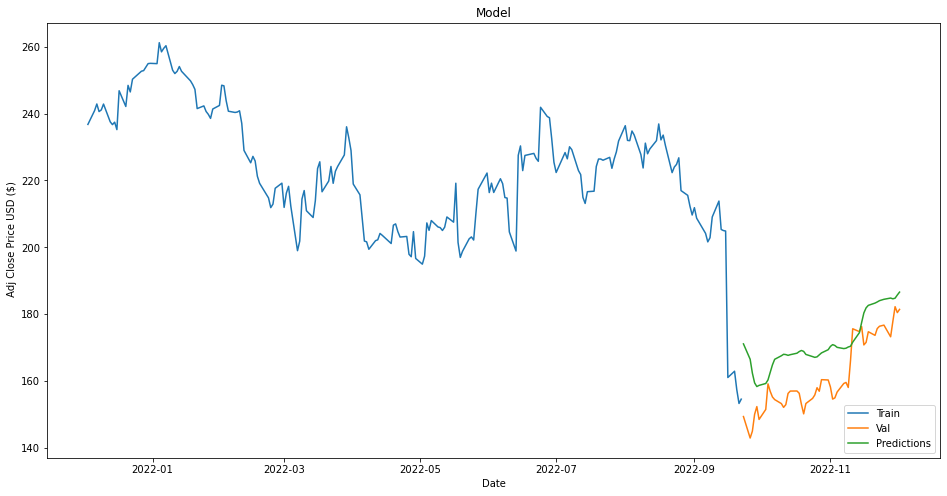

In [36]:
data_fdx = supply_data.filter(['FDX'])
train_fdx = data_fdx[:training_data_len_fdx]
validation_fdx = data_fdx[training_data_len_fdx:]
validation_fdx['Predictions'] = predictions_fdx
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel(' Adj Close Price USD ($)')
plt.plot(train_fdx)
plt.plot(validation_fdx)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## 'UPS'

In [37]:
supply_prices_ups = supply_data.filter(['UPS'])
values_ups = supply_prices_ups.values
training_data_len_ups = math.ceil(len(values_ups)* 0.8)

scaler_ups = MinMaxScaler(feature_range=(0,1))
scaled_data_ups = scaler_ups.fit_transform(values_ups.reshape(-1,1))
train_data_ups = scaled_data_ups[0: training_data_len_ups, :]

x_train_ups = []
y_train_ups = []

for i in range(60, len(train_data_ups)):
    x_train_ups.append(train_data_ups[i-60:i, 0])
    y_train_ups.append(train_data_ups[i, 0])
    
x_train_ups, y_train_ups= np.array(x_train_ups), np.array(y_train_ups)
x_train_ups = np.reshape(x_train_ups, (x_train_ups.shape[0], x_train_ups.shape[1], 1))

In [38]:
test_data_ups = scaled_data_ups[training_data_len_ups-60: , : ]
x_test_ups = []
y_test_ups = values_ups[training_data_len_ups:]

for i in range(60, len(test_data_ups)):
    x_test_ups.append(test_data_ups[i-60:i, 0])

x_test_ups = np.array(x_test_ups)
x_test_ups = np.reshape(x_test_ups, (x_test_ups.shape[0], x_test_ups.shape[1], 1))

In [39]:
model_ups = keras.Sequential()
model_ups.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_ups.shape[1], 1)))
model_ups.add(layers.LSTM(100, return_sequences=False))
model_ups.add(layers.Dense(25))
model_ups.add(layers.Dense(1))
model_ups.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_7 (LSTM)               (None, 100)               80400     
                                                                 
 dense_6 (Dense)             (None, 25)                2525      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [40]:
model_ups.compile(optimizer='adam', loss='mean_squared_error')
model_ups.fit(x_train_ups, y_train_ups, batch_size= 1, epochs=3)

Epoch 1/3
142/142 [==============================] - 14s 49ms/step - loss: 0.0215
Epoch 2/3
142/142 [==============================] - 5s 33ms/step - loss: 0.0103
Epoch 3/3
142/142 [==============================] - 6s 43ms/step - loss: 0.0090


In [41]:
predictions_ups= model_ups.predict(x_test_ups)
predictions_ups = scaler_ups.inverse_transform(predictions_ups)

2/2 [==============================] - 2s 42ms/step


In [42]:
model_ups.compile(optimizer='adam', loss='mean_squared_error')
model_ups.fit(x_train_ups, y_train_ups, batch_size= 1, epochs=3)

Epoch 1/3
142/142 [==============================] - 13s 41ms/step - loss: 0.0094
Epoch 2/3
142/142 [==============================] - 7s 50ms/step - loss: 0.0057
Epoch 3/3
142/142 [==============================] - 4s 29ms/step - loss: 0.0048


In [43]:
rmse_ups = np.sqrt(np.mean(predictions_ups - y_test_ups)**2)
rmse_ups

0.038592529296875

C:\Users\jai\AppData\Local\Temp\ipykernel_30944\1936048934.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_ups['Predictions'] = predictions_ups


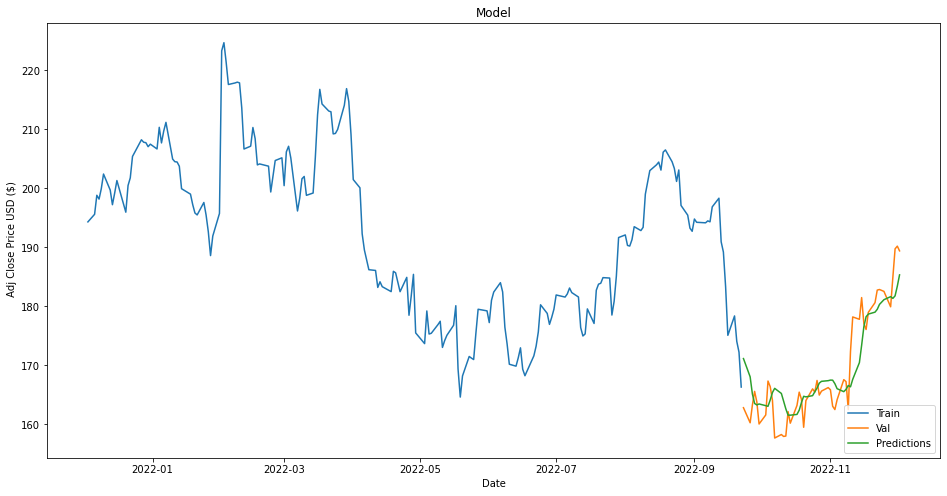

In [44]:
data_ups = supply_data.filter(['UPS'])
train_ups = data_ups[:training_data_len_ups]
validation_ups = data_ups[training_data_len_ups:]
validation_ups['Predictions'] = predictions_ups
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel(' Adj Close Price USD ($)')
plt.plot(train_ups)
plt.plot(validation_ups)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## 'XPO'

In [45]:
supply_prices_xpo = supply_data.filter(['XPO'])
values_xpo = supply_prices_xpo.values
training_data_len_xpo = math.ceil(len(values_xpo)* 0.8)

scaler_xpo = MinMaxScaler(feature_range=(0,1))
scaled_data_xpo = scaler_xpo.fit_transform(values_xpo.reshape(-1,1))
train_data_xpo = scaled_data_xpo[0: training_data_len_xpo, :]

x_train_xpo = []
y_train_xpo = []

for i in range(60, len(train_data_xpo)):
    x_train_xpo.append(train_data_xpo[i-60:i, 0])
    y_train_xpo.append(train_data_xpo[i, 0])
    
x_train_xpo, y_train_xpo = np.array(x_train_xpo), np.array(y_train_xpo)
x_train_xpo = np.reshape(x_train_xpo, (x_train_xpo.shape[0], x_train_xpo.shape[1], 1))

In [46]:
test_data_xpo = scaled_data_xpo[training_data_len_xpo-60: , : ]
x_test_xpo= []
y_test_xpo = values_xpo[training_data_len_xpo:]

for i in range(60, len(test_data_xpo)):
    x_test_xpo.append(test_data_xpo[i-60:i, 0])

x_test_xpo = np.array(x_test_xpo)
x_test_xpo = np.reshape(x_test_xpo, (x_test_xpo.shape[0], x_test_xpo.shape[1], 1))

In [47]:
model_xpo = keras.Sequential()
model_xpo.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_xpo.shape[1], 1)))
model_xpo.add(layers.LSTM(100, return_sequences=False))
model_xpo.add(layers.Dense(25))
model_xpo.add(layers.Dense(1))
model_xpo.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_9 (LSTM)               (None, 100)               80400     
                                                                 
 dense_8 (Dense)             (None, 25)                2525      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [48]:
model_xpo.compile(optimizer='adam', loss='mean_squared_error')
model_xpo.fit(x_train_xpo, y_train_xpo, batch_size= 1, epochs=3)

Epoch 1/3
142/142 [==============================] - 13s 30ms/step - loss: 0.0211
Epoch 2/3
142/142 [==============================] - 6s 41ms/step - loss: 0.0107
Epoch 3/3
142/142 [==============================] - 7s 49ms/step - loss: 0.0101


In [49]:
predictions_xpo= model_xpo.predict(x_test_xpo)
predictions_xpo = scaler_xpo.inverse_transform(predictions_xpo)

2/2 [==============================] - 1s 26ms/step


In [50]:
rmse_xpo = np.sqrt(np.mean(predictions_xpo - y_test_xpo)**2)
rmse_xpo

0.25741336822509764

C:\Users\jai\AppData\Local\Temp\ipykernel_30944\1253156131.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_xpo['Predictions'] = predictions_xpo


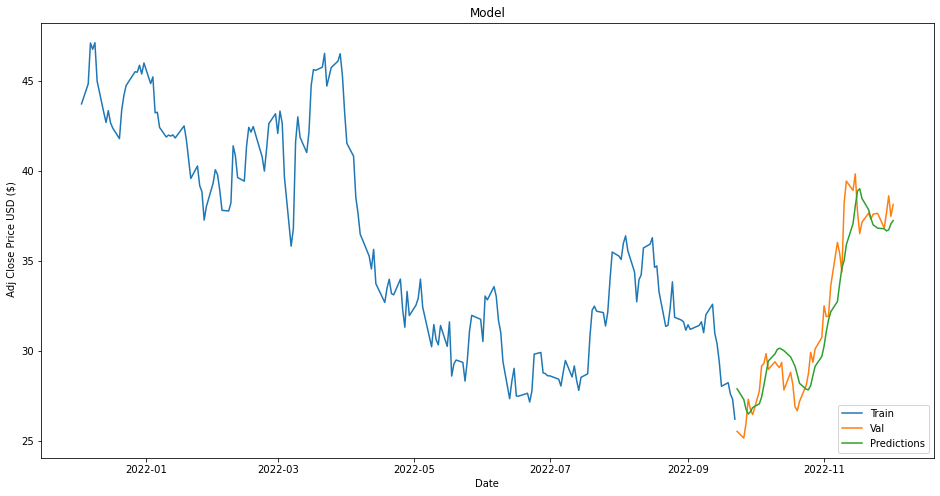

In [51]:
data_xpo = supply_data.filter(['XPO'])
train_xpo = data_xpo[:training_data_len_xpo]
validation_xpo = data_xpo[training_data_len_xpo:]
validation_xpo['Predictions'] = predictions_xpo
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel(' Adj Close Price USD ($)')
plt.plot(train_xpo)
plt.plot(validation_xpo)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## Creating Models on Insurance Stocks

## 'CB'

In [52]:
insurance_prices_cb = insurance_data.filter(['CB'])
values_cb = insurance_prices_cb.values
training_data_len_cb = math.ceil(len(values_cb)* 0.8)

scaler_cb = MinMaxScaler(feature_range=(0,1))
scaled_data_cb = scaler_cb.fit_transform(values_cb.reshape(-1,1))
train_data_cb = scaled_data_cb[0: training_data_len_cb, :]

x_train_cb = []
y_train_cb = []

for i in range(60, len(train_data_cb)):
    x_train_cb.append(train_data_cb[i-60:i, 0])
    y_train_cb.append(train_data_cb[i, 0])
    
x_train_cb, y_train_cb = np.array(x_train_cb), np.array(y_train_cb)
x_train_cb = np.reshape(x_train_cb, (x_train_cb.shape[0], x_train_cb.shape[1], 1))

In [53]:
test_data_cb = scaled_data_cb[training_data_len_cb-60: , : ]
x_test_cb= []
y_test_cb = values_cb[training_data_len_cb:]

for i in range(60, len(test_data_cb)):
    x_test_cb.append(test_data_cb[i-60:i, 0])

x_test_cb = np.array(x_test_cb)
x_test_cb = np.reshape(x_test_cb, (x_test_cb.shape[0], x_test_cb.shape[1], 1))

In [54]:
model_cb = keras.Sequential()
model_cb.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_cb.shape[1], 1)))
model_cb.add(layers.LSTM(100, return_sequences=False))
model_cb.add(layers.Dense(25))
model_cb.add(layers.Dense(1))
model_cb.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_11 (LSTM)              (None, 100)               80400     
                                                                 
 dense_10 (Dense)            (None, 25)                2525      
                                                                 
 dense_11 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [55]:
model_cb.compile(optimizer='adam', loss='mean_squared_error')
model_cb.fit(x_train_cb, y_train_cb, batch_size= 1, epochs=3)

Epoch 1/3
142/142 [==============================] - 14s 44ms/step - loss: 0.0176
Epoch 2/3
142/142 [==============================] - 4s 30ms/step - loss: 0.0137
Epoch 3/3
142/142 [==============================] - 7s 50ms/step - loss: 0.0087


In [56]:
predictions_cb= model_cb.predict(x_test_cb)
predictions_cb = scaler_cb.inverse_transform(predictions_cb)

2/2 [==============================] - 2s 46ms/step


In [57]:
rmse_cb = np.sqrt(np.mean(predictions_cb - y_test_cb)**2)
rmse_cb

0.7219351196289062

C:\Users\jai\AppData\Local\Temp\ipykernel_30944\1639545291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_cb['Predictions'] = predictions_cb


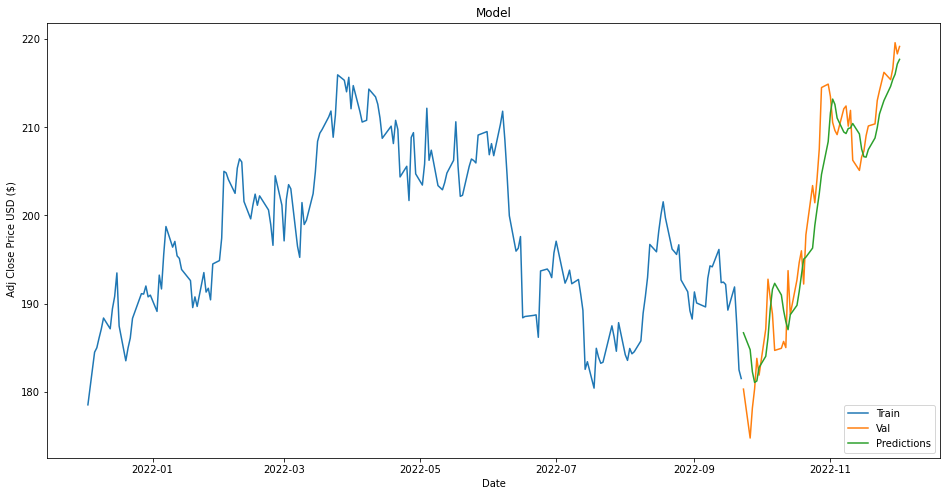

In [58]:
data_cb = insurance_data.filter(['CB'])
train_cb = data_cb[:training_data_len_cb]
validation_cb = data_cb[training_data_len_cb:]
validation_cb['Predictions'] = predictions_cb
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel(' Adj Close Price USD ($)')
plt.plot(train_cb)
plt.plot(validation_cb)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## 'ERIE'

In [59]:
insurance_prices_erie = insurance_data.filter(['ERIE'])
values_erie = insurance_prices_erie.values
training_data_len_erie = math.ceil(len(values_erie)* 0.8)

scaler_erie = MinMaxScaler(feature_range=(0,1))
scaled_data_erie = scaler_erie.fit_transform(values_erie.reshape(-1,1))
train_data_erie = scaled_data_erie[0: training_data_len_erie, :]

x_train_erie = []
y_train_erie = []

for i in range(60, len(train_data_erie)):
    x_train_erie.append(train_data_erie[i-60:i, 0])
    y_train_erie.append(train_data_erie[i, 0])
    
x_train_erie, y_train_erie = np.array(x_train_erie), np.array(y_train_erie)
x_train_erie = np.reshape(x_train_erie, (x_train_erie.shape[0], x_train_erie.shape[1], 1))

In [60]:
test_data_erie = scaled_data_erie[training_data_len_erie-60: , : ]
x_test_erie= []
y_test_erie = values_erie[training_data_len_erie:]

for i in range(60, len(test_data_erie)):
    x_test_erie.append(test_data_erie[i-60:i, 0])

x_test_erie = np.array(x_test_erie)
x_test_erie = np.reshape(x_test_erie, (x_test_erie.shape[0], x_test_erie.shape[1], 1))

In [61]:
model_erie = keras.Sequential()
model_erie.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_erie.shape[1], 1)))
model_erie.add(layers.LSTM(100, return_sequences=False))
model_erie.add(layers.Dense(25))
model_erie.add(layers.Dense(1))
model_erie.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_13 (LSTM)              (None, 100)               80400     
                                                                 
 dense_12 (Dense)            (None, 25)                2525      
                                                                 
 dense_13 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [62]:
model_erie.compile(optimizer='adam', loss='mean_squared_error')
model_erie.fit(x_train_erie, y_train_erie, batch_size= 1, epochs=3)

Epoch 1/3
142/142 [==============================] - 13s 50ms/step - loss: 0.0046
Epoch 2/3
142/142 [==============================] - 5s 36ms/step - loss: 0.0023
Epoch 3/3
142/142 [==============================] - 5s 36ms/step - loss: 0.0018


In [63]:
predictions_erie= model_erie.predict(x_test_erie)
predictions_erie = scaler_erie.inverse_transform(predictions_erie)

2/2 [==============================] - 3s 48ms/step


In [64]:
rmse_erie = np.sqrt(np.mean(predictions_erie- y_test_erie)**2)
rmse_erie

4.174077453613282

C:\Users\jai\AppData\Local\Temp\ipykernel_30944\1289600472.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_erie['Predictions'] = predictions_erie


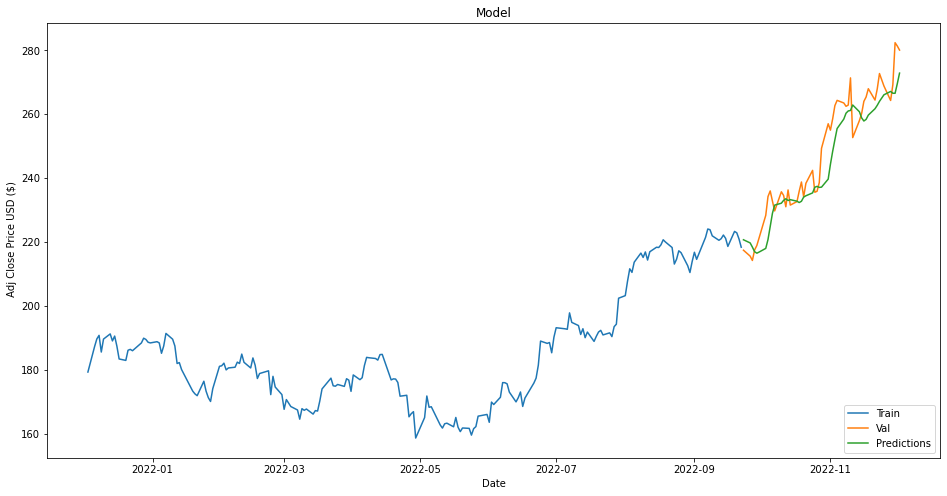

In [65]:
data_erie = insurance_data.filter(['ERIE'])
train_erie = data_erie[:training_data_len_erie]
validation_erie = data_erie[training_data_len_erie:]
validation_erie['Predictions'] = predictions_erie
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel(' Adj Close Price USD ($)')
plt.plot(train_erie)
plt.plot(validation_erie)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## 'PGR'

In [66]:
insurance_prices_pgr = insurance_data.filter(['PGR'])
values_pgr = insurance_prices_pgr.values
training_data_len_pgr = math.ceil(len(values_pgr)* 0.8)

scaler_pgr = MinMaxScaler(feature_range=(0,1))
scaled_data_pgr = scaler_pgr.fit_transform(values_pgr.reshape(-1,1))
train_data_pgr = scaled_data_pgr[0: training_data_len_pgr, :]

x_train_pgr = []
y_train_pgr = []

for i in range(60, len(train_data_pgr)):
    x_train_pgr.append(train_data_pgr[i-60:i, 0])
    y_train_pgr.append(train_data_pgr[i, 0])
    
x_train_pgr, y_train_pgr = np.array(x_train_pgr), np.array(y_train_pgr)
x_train_pgr = np.reshape(x_train_pgr, (x_train_pgr.shape[0], x_train_pgr.shape[1], 1))

In [67]:
test_data_pgr = scaled_data_pgr[training_data_len_pgr-60: , : ]
x_test_pgr= []
y_test_pgr = values_pgr[training_data_len_pgr:]

for i in range(60, len(test_data_pgr)):
    x_test_pgr.append(test_data_pgr[i-60:i, 0])

x_test_pgr = np.array(x_test_pgr)
x_test_pgr = np.reshape(x_test_pgr, (x_test_pgr.shape[0], x_test_pgr.shape[1], 1))

In [68]:
model_pgr = keras.Sequential()
model_pgr.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_pgr.shape[1], 1)))
model_pgr.add(layers.LSTM(100, return_sequences=False))
model_pgr.add(layers.Dense(25))
model_pgr.add(layers.Dense(1))
model_pgr.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_15 (LSTM)              (None, 100)               80400     
                                                                 
 dense_14 (Dense)            (None, 25)                2525      
                                                                 
 dense_15 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [69]:
model_pgr.compile(optimizer='adam', loss='mean_squared_error')
model_pgr.fit(x_train_pgr, y_train_pgr, batch_size= 1, epochs=3)

Epoch 1/3
142/142 [==============================] - 14s 45ms/step - loss: 0.0177
Epoch 2/3
142/142 [==============================] - 7s 46ms/step - loss: 0.0082
Epoch 3/3
142/142 [==============================] - 4s 28ms/step - loss: 0.0060


In [70]:
predictions_pgr= model_pgr.predict(x_test_pgr)
predictions_pgr = scaler_pgr.inverse_transform(predictions_pgr)

2/2 [==============================] - 2s 47ms/step


In [71]:
rmse_pgr = np.sqrt(np.mean(predictions_pgr- y_test_erie)**2)
rmse_pgr

125.35429290771485

C:\Users\jai\AppData\Local\Temp\ipykernel_30944\2292575054.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_pgr['Predictions'] = predictions_pgr


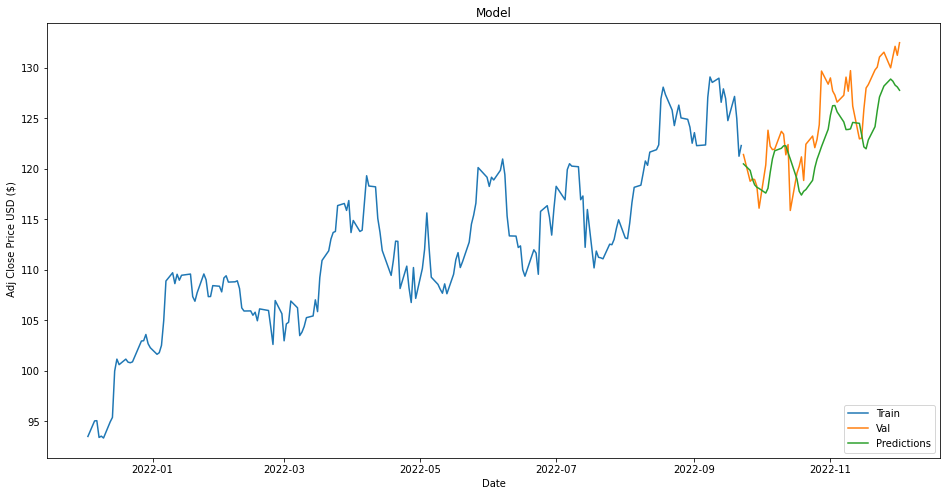

In [72]:
data_pgr = insurance_data.filter(['PGR'])
train_pgr = data_pgr[:training_data_len_pgr]
validation_pgr = data_pgr[training_data_len_pgr:]
validation_pgr['Predictions'] = predictions_pgr
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel(' Adj Close Price USD ($)')
plt.plot(train_pgr)
plt.plot(validation_pgr)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## 'RLI'

In [73]:
insurance_prices_rli = insurance_data.filter(['RLI'])
values_rli = insurance_prices_rli.values
training_data_len_rli = math.ceil(len(values_rli)* 0.8)

scaler_rli = MinMaxScaler(feature_range=(0,1))
scaled_data_rli = scaler_rli.fit_transform(values_rli.reshape(-1,1))
train_data_rli = scaled_data_rli[0: training_data_len_rli, :]

x_train_rli = []
y_train_rli = []

for i in range(60, len(train_data_rli)):
    x_train_rli.append(train_data_rli[i-60:i, 0])
    y_train_rli.append(train_data_rli[i, 0])
    
x_train_rli, y_train_rli = np.array(x_train_rli), np.array(y_train_rli)
x_train_rli = np.reshape(x_train_rli, (x_train_rli.shape[0], x_train_rli.shape[1], 1))

In [74]:
test_data_rli = scaled_data_rli[training_data_len_rli-60: , : ]
x_test_rli= []
y_test_rli = values_rli[training_data_len_rli:]

for i in range(60, len(test_data_rli)):
    x_test_rli.append(test_data_rli[i-60:i, 0])

x_test_rli = np.array(x_test_rli)
x_test_rli = np.reshape(x_test_rli, (x_test_rli.shape[0], x_test_rli.shape[1], 1))

In [75]:
model_rli = keras.Sequential()
model_rli.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_rli.shape[1], 1)))
model_rli.add(layers.LSTM(100, return_sequences=False))
model_rli.add(layers.Dense(25))
model_rli.add(layers.Dense(1))
model_rli.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_17 (LSTM)              (None, 100)               80400     
                                                                 
 dense_16 (Dense)            (None, 25)                2525      
                                                                 
 dense_17 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [76]:
model_rli.compile(optimizer='adam', loss='mean_squared_error')
model_rli.fit(x_train_rli, y_train_rli, batch_size= 1, epochs=3)

Epoch 1/3
142/142 [==============================] - 14s 38ms/step - loss: 0.0074
Epoch 2/3
142/142 [==============================] - 7s 51ms/step - loss: 0.0061
Epoch 3/3
142/142 [==============================] - 5s 35ms/step - loss: 0.0036


In [77]:
predictions_rli= model_rli.predict(x_test_rli)
predictions_rli = scaler_rli.inverse_transform(predictions_rli)

2/2 [==============================] - 1s 57ms/step


In [78]:
rmse_rli = np.sqrt(np.mean(predictions_rli- y_test_rli)**2)
rmse_rli

2.6982940673828124

C:\Users\jai\AppData\Local\Temp\ipykernel_30944\1614506296.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_rli['Predictions'] = predictions_rli


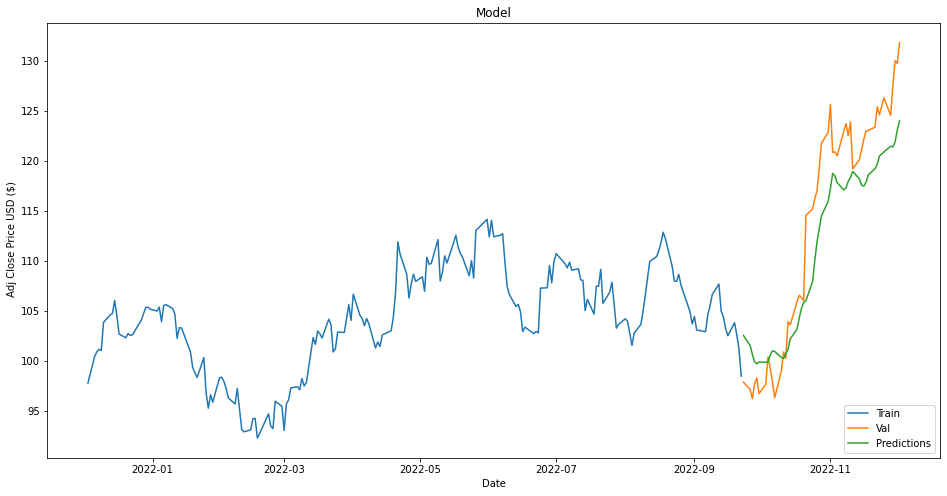

In [79]:
data_rli = insurance_data.filter(['RLI'])
train_rli = data_rli[:training_data_len_rli]
validation_rli = data_rli[training_data_len_rli:]
validation_rli['Predictions'] = predictions_rli
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel(' Adj Close Price USD ($)')
plt.plot(train_rli)
plt.plot(validation_rli)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## 'TRV'

In [80]:
insurance_prices_trv = insurance_data.filter(['TRV'])
values_trv = insurance_prices_trv.values
training_data_len_trv = math.ceil(len(values_trv)* 0.8)

scaler_trv = MinMaxScaler(feature_range=(0,1))
scaled_data_trv = scaler_trv.fit_transform(values_trv.reshape(-1,1))
train_data_trv = scaled_data_trv[0: training_data_len_trv, :]

x_train_trv = []
y_train_trv = []

for i in range(60, len(train_data_trv)):
    x_train_trv.append(train_data_trv[i-60:i, 0])
    y_train_trv.append(train_data_trv[i, 0])
    
x_train_trv, y_train_trv = np.array(x_train_trv), np.array(y_train_trv)
x_train_trv = np.reshape(x_train_trv, (x_train_trv.shape[0], x_train_trv.shape[1], 1))

In [81]:
test_data_trv = scaled_data_trv[training_data_len_trv-60: , : ]
x_test_trv= []
y_test_trv = values_trv[training_data_len_trv:]

for i in range(60, len(test_data_trv)):
    x_test_trv.append(test_data_trv[i-60:i, 0])

x_test_trv = np.array(x_test_trv)
x_test_trv = np.reshape(x_test_trv, (x_test_trv.shape[0], x_test_trv.shape[1], 1))

In [82]:
model_trv = keras.Sequential()
model_trv.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_trv.shape[1], 1)))
model_trv.add(layers.LSTM(100, return_sequences=False))
model_trv.add(layers.Dense(25))
model_trv.add(layers.Dense(1))
model_trv.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_19 (LSTM)              (None, 100)               80400     
                                                                 
 dense_18 (Dense)            (None, 25)                2525      
                                                                 
 dense_19 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [83]:
model_trv.compile(optimizer='adam', loss='mean_squared_error')
model_trv.fit(x_train_trv, y_train_trv, batch_size= 1, epochs=3)

Epoch 1/3
142/142 [==============================] - 13s 29ms/step - loss: 0.0239
Epoch 2/3
142/142 [==============================] - 6s 44ms/step - loss: 0.0113
Epoch 3/3
142/142 [==============================] - 7s 47ms/step - loss: 0.0076


In [84]:
predictions_trv= model_trv.predict(x_test_trv)
predictions_trv = scaler_trv.inverse_transform(predictions_trv)

2/2 [==============================] - 1s 48ms/step


In [85]:
rmse_trv = np.sqrt(np.mean(predictions_trv- y_test_trv)**2)
rmse_trv

3.124181213378906

C:\Users\jai\AppData\Local\Temp\ipykernel_30944\3253659280.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_trv['Predictions'] = predictions_trv


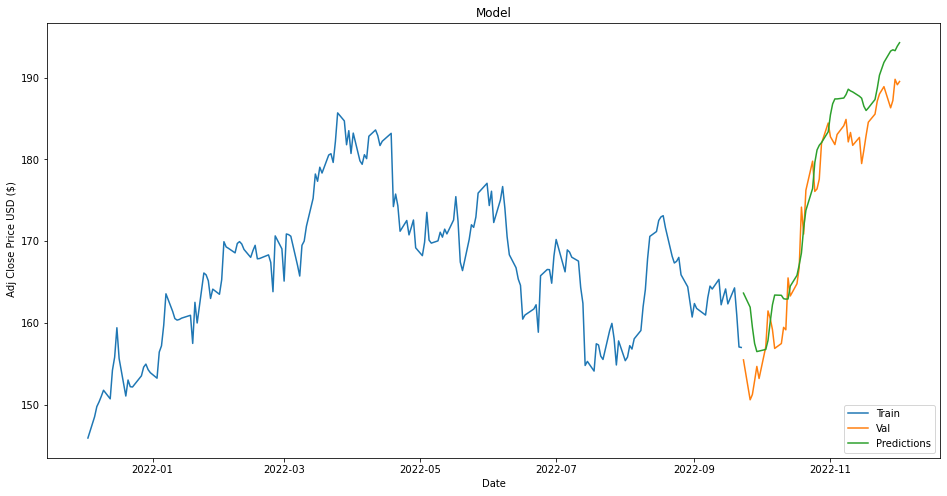

In [86]:
data_trv = insurance_data.filter(['TRV'])
train_trv = data_trv[:training_data_len_trv]
validation_trv = data_trv[training_data_len_trv:]
validation_trv['Predictions'] = predictions_trv
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel(' Adj Close Price USD ($)')
plt.plot(train_trv)
plt.plot(validation_trv)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## Creating Models on Automotive Stocks

## Replacing NA values in Automotive data with average values

In [87]:
automotive_data[['F']] = automotive_data[['F']].fillna(automotive_data[['F']].mean())
automotive_data[['GM']] = automotive_data[['GM']].fillna(automotive_data[['GM']].mean())
automotive_data[['TM']] = automotive_data[['TM']].fillna(automotive_data[['TM']].mean())
automotive_data[['VOW3.DE']] = automotive_data[['VOW3.DE']].fillna(automotive_data[['VOW3.DE']].mean())
automotive_data[['RACE']] = automotive_data[['RACE']].fillna(automotive_data[['RACE']].mean())
automotive_data[['TSLA']] = automotive_data[['TSLA']].fillna(automotive_data[['TSLA']].mean())

## 'F'

In [88]:
automotive_prices_f = automotive_data.filter(['F'])
values_f = automotive_prices_f.values
training_data_len_f = math.ceil(len(values_f)* 0.8)

scaler_f = MinMaxScaler(feature_range=(0,1))
scaled_data_f = scaler_f.fit_transform(values_f.reshape(-1,1))
train_data_f = scaled_data_f[0: training_data_len_f, :]

x_train_f = []
y_train_f = []

for i in range(60, len(train_data_f)):
    x_train_f.append(train_data_f[i-60:i, 0])
    y_train_f.append(train_data_f[i, 0])
    
x_train_f, y_train_f = np.array(x_train_f), np.array(y_train_f)
x_train_f = np.reshape(x_train_f, (x_train_f.shape[0], x_train_f.shape[1], 1))

In [89]:
test_data_f = scaled_data_f[training_data_len_f-60: , : ]
x_test_f= []
y_test_f = values_f[training_data_len_f:]

for i in range(60, len(test_data_f)):
    x_test_f.append(test_data_f[i-60:i, 0])

x_test_f = np.array(x_test_f)
x_test_f = np.reshape(x_test_f, (x_test_f.shape[0], x_test_f.shape[1], 1))

In [90]:
model_f = keras.Sequential()
model_f.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_f.shape[1], 1)))
model_f.add(layers.LSTM(100, return_sequences=False))
model_f.add(layers.Dense(25))
model_f.add(layers.Dense(1))
model_f.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_21 (LSTM)              (None, 100)               80400     
                                                                 
 dense_20 (Dense)            (None, 25)                2525      
                                                                 
 dense_21 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [91]:
model_f.compile(optimizer='adam', loss='mean_squared_error')
model_f.fit(x_train_f, y_train_f, batch_size= 1, epochs=3)

Epoch 1/3
148/148 [==============================] - 14s 44ms/step - loss: 0.0099
Epoch 2/3
148/148 [==============================] - 5s 32ms/step - loss: 0.0055
Epoch 3/3
148/148 [==============================] - 7s 50ms/step - loss: 0.0047


In [92]:
predictions_f= model_f.predict(x_test_f)
predictions_f = scaler_f.inverse_transform(predictions_f)

2/2 [==============================] - 2s 43ms/step


In [93]:
rmse_f = np.sqrt(np.mean(predictions_f- y_test_f)**2)
rmse_f

0.10991292092971895

C:\Users\jai\AppData\Local\Temp\ipykernel_30944\2852748524.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_f['Predictions'] = predictions_f


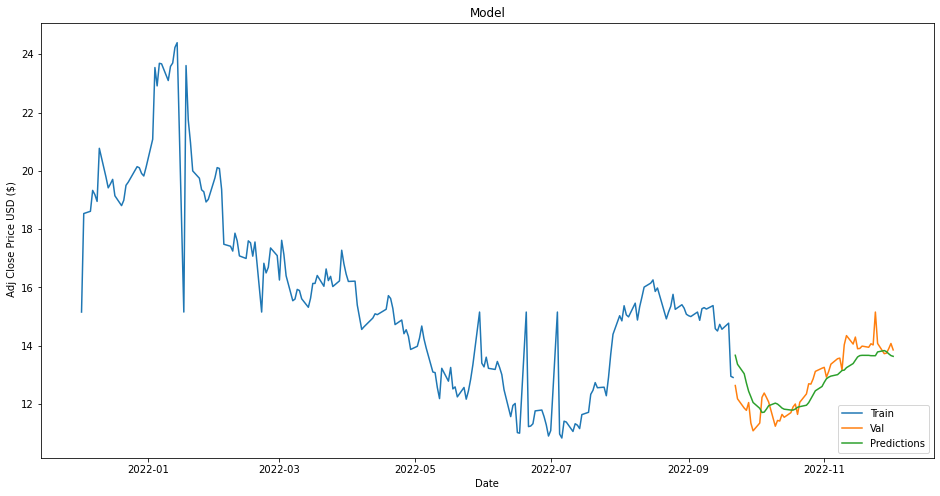

In [94]:
data_f = automotive_data.filter(['F'])
train_f = data_f[:training_data_len_f]
validation_f = data_f[training_data_len_f:]
validation_f['Predictions'] = predictions_f
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel(' Adj Close Price USD ($)')
plt.plot(train_f)
plt.plot(validation_f)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## 'GM'

In [95]:
automotive_prices_gm = automotive_data.filter(['GM'])
values_gm = automotive_prices_gm.values
training_data_len_gm = math.ceil(len(values_gm)* 0.8)

scaler_gm = MinMaxScaler(feature_range=(0,1))
scaled_data_gm = scaler_gm.fit_transform(values_gm.reshape(-1,1))
train_data_gm = scaled_data_gm[0: training_data_len_gm, :]

x_train_gm = []
y_train_gm = []

for i in range(60, len(train_data_gm)):
    x_train_gm.append(train_data_gm[i-60:i, 0])
    y_train_gm.append(train_data_gm[i, 0])
    
x_train_gm, y_train_gm = np.array(x_train_gm), np.array(y_train_gm)
x_train_gm = np.reshape(x_train_gm, (x_train_gm.shape[0], x_train_gm.shape[1], 1))

In [96]:
test_data_gm = scaled_data_gm[training_data_len_gm-60: , : ]
x_test_gm= []
y_test_gm = values_gm[training_data_len_gm:]

for i in range(60, len(test_data_gm)):
    x_test_gm.append(test_data_gm[i-60:i, 0])

x_test_gm = np.array(x_test_gm)
x_test_gm = np.reshape(x_test_gm, (x_test_gm.shape[0], x_test_gm.shape[1], 1))

In [97]:
model_gm = keras.Sequential()
model_gm.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_gm.shape[1], 1)))
model_gm.add(layers.LSTM(100, return_sequences=False))
model_gm.add(layers.Dense(25))
model_gm.add(layers.Dense(1))
model_gm.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_23 (LSTM)              (None, 100)               80400     
                                                                 
 dense_22 (Dense)            (None, 25)                2525      
                                                                 
 dense_23 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [98]:
model_gm

In [99]:
model_gm.compile(optimizer='adam', loss='mean_squared_error')
model_gm.fit(x_train_gm, y_train_gm, batch_size= 1, epochs=3)

Epoch 1/3
148/148 [==============================] - 14s 49ms/step - loss: 0.0052
Epoch 2/3
148/148 [==============================] - 4s 25ms/step - loss: 0.0052
Epoch 3/3
148/148 [==============================] - 7s 48ms/step - loss: 0.0039


In [100]:
predictions_gm= model_gm.predict(x_test_gm)
predictions_gm = scaler_gm.inverse_transform(predictions_gm)

2/2 [==============================] - 2s 48ms/step


In [101]:
rmse_gm = np.sqrt(np.mean(predictions_gm- y_test_gm)**2)
rmse_gm

0.5171646905906034

C:\Users\jai\AppData\Local\Temp\ipykernel_30944\2209413880.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_gm['Predictions'] = predictions_gm


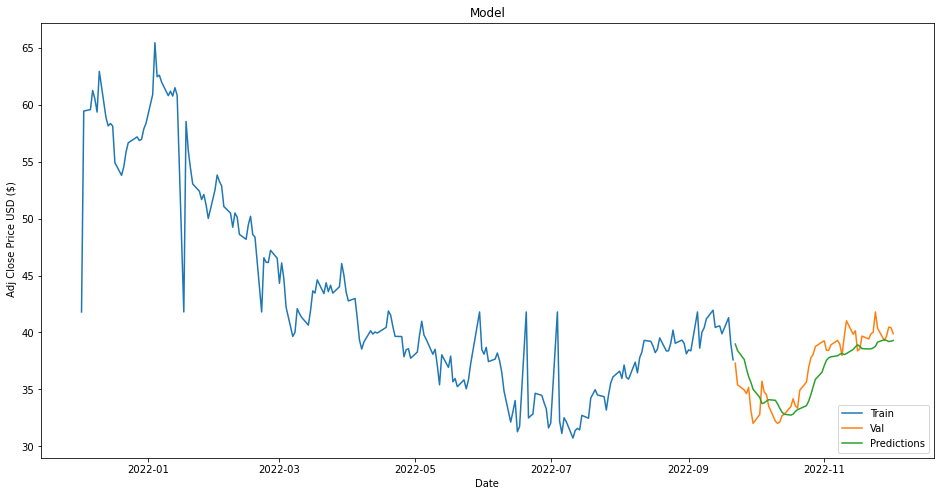

In [102]:
data_gm = automotive_data.filter(['GM'])
train_gm = data_gm[:training_data_len_gm]
validation_gm = data_gm[training_data_len_gm:]
validation_gm['Predictions'] = predictions_gm
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel(' Adj Close Price USD ($)')
plt.plot(train_gm)
plt.plot(validation_gm)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## 'RACE'

In [103]:
automotive_prices_r = automotive_data.filter(['RACE'])
values_r = automotive_prices_r.values
training_data_len_r = math.ceil(len(values_r)* 0.8)

scaler_r = MinMaxScaler(feature_range=(0,1))
scaled_data_r = scaler_r.fit_transform(values_r.reshape(-1,1))
train_data_r = scaled_data_r[0: training_data_len_r, :]

x_train_r = []
y_train_r = []

for i in range(60, len(train_data_r)):
    x_train_r.append(train_data_r[i-60:i, 0])
    y_train_r.append(train_data_r[i, 0])
    
x_train_r, y_train_r = np.array(x_train_r), np.array(y_train_r)
x_train_r = np.reshape(x_train_r, (x_train_r.shape[0], x_train_r.shape[1], 1))

In [104]:
test_data_r = scaled_data_r[training_data_len_r-60: , : ]
x_test_r= []
y_test_r = values_r[training_data_len_r:]

for i in range(60, len(test_data_r)):
    x_test_r.append(test_data_r[i-60:i, 0])

x_test_r = np.array(x_test_r)
x_test_r = np.reshape(x_test_r, (x_test_r.shape[0], x_test_r.shape[1], 1))

In [105]:
model_r = keras.Sequential()
model_r.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_r.shape[1], 1)))
model_r.add(layers.LSTM(100, return_sequences=False))
model_r.add(layers.Dense(25))
model_r.add(layers.Dense(1))
model_r.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_25 (LSTM)              (None, 100)               80400     
                                                                 
 dense_24 (Dense)            (None, 25)                2525      
                                                                 
 dense_25 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [106]:
model_r.compile(optimizer='adam', loss='mean_squared_error')
model_r.fit(x_train_r, y_train_r, batch_size= 1, epochs=3)

Epoch 1/3
148/148 [==============================] - 14s 49ms/step - loss: 0.0114
Epoch 2/3
148/148 [==============================] - 5s 35ms/step - loss: 0.0071
Epoch 3/3
148/148 [==============================] - 6s 40ms/step - loss: 0.0069


In [107]:
predictions_r= model_r.predict(x_test_r)
predictions_r = scaler_r.inverse_transform(predictions_r)

2/2 [==============================] - 2s 57ms/step


In [108]:
rmse_r = np.sqrt(np.mean(predictions_r- y_test_r)**2)
rmse_r

2.623155436673007

C:\Users\jai\AppData\Local\Temp\ipykernel_30944\1228944800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_r['Predictions'] = predictions_r


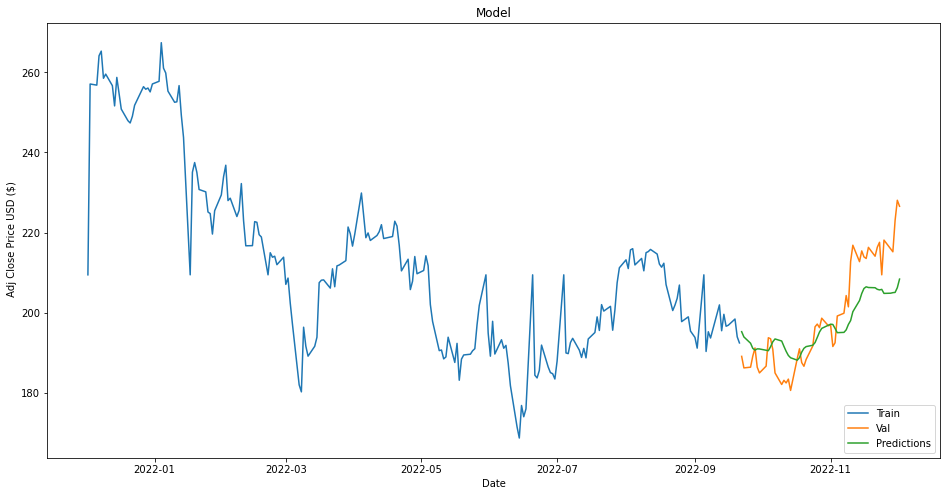

In [109]:
data_r = automotive_data.filter(['RACE'])
train_r = data_r[:training_data_len_r]
validation_r = data_r[training_data_len_r:]
validation_r['Predictions'] = predictions_r
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel(' Adj Close Price USD ($)')
plt.plot(train_r)
plt.plot(validation_r)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## 'TM'

In [110]:
automotive_prices_t = automotive_data.filter(['TM'])
values_t = automotive_prices_t.values
training_data_len_t = math.ceil(len(values_t)* 0.8)

scaler_t = MinMaxScaler(feature_range=(0,1))
scaled_data_t = scaler_t.fit_transform(values_t.reshape(-1,1))
train_data_t = scaled_data_t[0: training_data_len_t, :]

x_train_t = []
y_train_t = []

for i in range(60, len(train_data_t)):
    x_train_t.append(train_data_t[i-60:i, 0])
    y_train_t.append(train_data_t[i, 0])
    
x_train_t, y_train_t = np.array(x_train_t), np.array(y_train_t)
x_train_t = np.reshape(x_train_t, (x_train_t.shape[0], x_train_t.shape[1], 1))

In [111]:
test_data_t = scaled_data_t[training_data_len_t-60: , : ]
x_test_t= []
y_test_t = values_t[training_data_len_t:]

for i in range(60, len(test_data_t)):
    x_test_t.append(test_data_t[i-60:i, 0])

x_test_t = np.array(x_test_t)
x_test_t = np.reshape(x_test_t, (x_test_t.shape[0], x_test_t.shape[1], 1))

In [112]:
model_t = keras.Sequential()
model_t.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_t.shape[1], 1)))
model_t.add(layers.LSTM(100, return_sequences=False))
model_t.add(layers.Dense(25))
model_t.add(layers.Dense(1))
model_t.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_27 (LSTM)              (None, 100)               80400     
                                                                 
 dense_26 (Dense)            (None, 25)                2525      
                                                                 
 dense_27 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [113]:
model_t.compile(optimizer='adam', loss='mean_squared_error')
model_t.fit(x_train_t, y_train_t, batch_size= 1, epochs=3)

Epoch 1/3
148/148 [==============================] - 15s 49ms/step - loss: 0.0106
Epoch 2/3
148/148 [==============================] - 6s 41ms/step - loss: 0.0063
Epoch 3/3
148/148 [==============================] - 5s 36ms/step - loss: 0.0049


In [114]:
predictions_t= model_t.predict(x_test_t)
predictions_t = scaler_t.inverse_transform(predictions_t)

2/2 [==============================] - 2s 49ms/step


In [115]:
rmse_t = np.sqrt(np.mean(predictions_t- y_test_t)**2)
rmse_t

2.1149297581487523

C:\Users\jai\AppData\Local\Temp\ipykernel_30944\2989434049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_t['Predictions'] = predictions_t


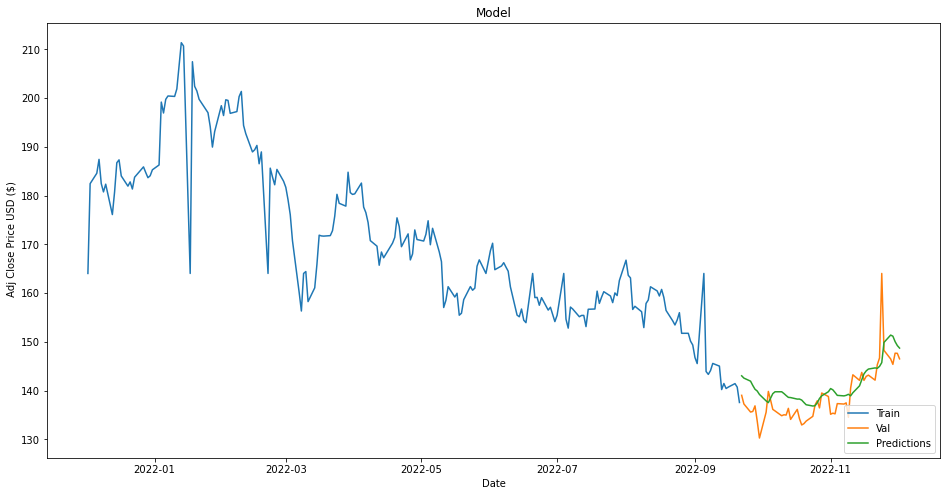

In [116]:
data_t = automotive_data.filter(['TM'])
train_t = data_t[:training_data_len_t]
validation_t = data_t[training_data_len_t:]
validation_t['Predictions'] = predictions_t
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel(' Adj Close Price USD ($)')
plt.plot(train_t)
plt.plot(validation_t)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## 'TSLA'

In [117]:
automotive_prices_ts = automotive_data.filter(['TSLA'])
values_ts = automotive_prices_ts.values
training_data_len_ts = math.ceil(len(values_ts)* 0.8)

scaler_ts = MinMaxScaler(feature_range=(0,1))
scaled_data_ts = scaler_ts.fit_transform(values_ts.reshape(-1,1))
train_data_ts = scaled_data_ts[0: training_data_len_ts, :]

x_train_ts = []
y_train_ts = []

for i in range(60, len(train_data_ts)):
    x_train_ts.append(train_data_ts[i-60:i, 0])
    y_train_ts.append(train_data_ts[i, 0])
    
x_train_ts, y_train_ts = np.array(x_train_ts), np.array(y_train_ts)
x_train_ts = np.reshape(x_train_ts, (x_train_ts.shape[0], x_train_ts.shape[1], 1))

In [118]:
test_data_ts = scaled_data_ts[training_data_len_ts-60: , : ]
x_test_ts= []
y_test_ts = values_ts[training_data_len_ts:]

for i in range(60, len(test_data_ts)):
    x_test_ts.append(test_data_ts[i-60:i, 0])

x_test_ts = np.array(x_test_ts)
x_test_ts = np.reshape(x_test_ts, (x_test_ts.shape[0], x_test_ts.shape[1], 1))

In [119]:
model_ts = keras.Sequential()
model_ts.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_ts.shape[1], 1)))
model_ts.add(layers.LSTM(100, return_sequences=False))
model_ts.add(layers.Dense(25))
model_ts.add(layers.Dense(1))
model_ts.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_29 (LSTM)              (None, 100)               80400     
                                                                 
 dense_28 (Dense)            (None, 25)                2525      
                                                                 
 dense_29 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [120]:
model_ts.compile(optimizer='adam', loss='mean_squared_error')
model_ts.fit(x_train_ts, y_train_ts, batch_size= 1, epochs=3)

Epoch 1/3
148/148 [==============================] - 13s 41ms/step - loss: 0.0191
Epoch 2/3
148/148 [==============================] - 7s 50ms/step - loss: 0.0100
Epoch 3/3
148/148 [==============================] - 4s 27ms/step - loss: 0.0092


In [121]:
predictions_ts= model_ts.predict(x_test_ts)
predictions_ts = scaler_ts.inverse_transform(predictions_ts)

2/2 [==============================] - 2s 62ms/step


In [122]:
rmse_ts = np.sqrt(np.mean(predictions_ts- y_test_ts)**2)
rmse_ts

9.749886724683973

C:\Users\jai\AppData\Local\Temp\ipykernel_30944\3427470422.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_ts['Predictions'] = predictions_ts


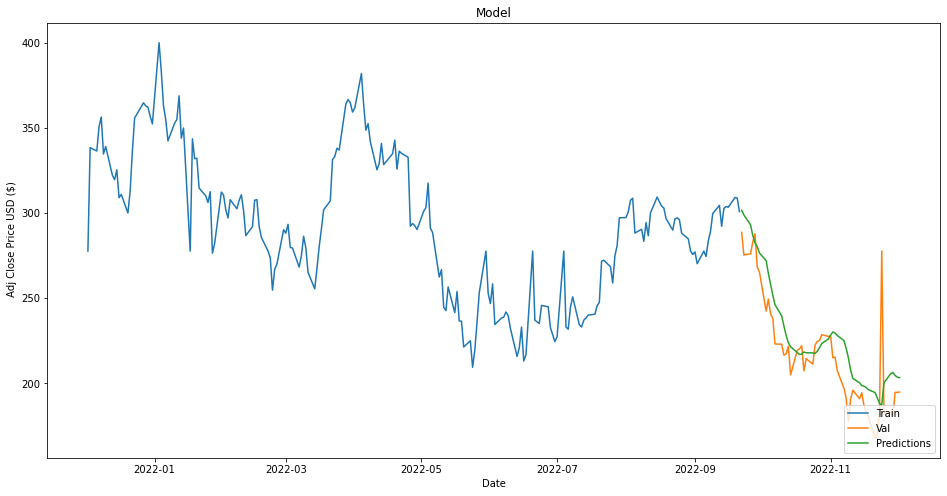

In [123]:
data_ts = automotive_data.filter(['TSLA'])
train_ts = data_ts[:training_data_len_ts]
validation_ts = data_ts[training_data_len_ts:]
validation_ts['Predictions'] = predictions_ts
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel(' Adj Close Price USD ($)')
plt.plot(train_ts)
plt.plot(validation_ts)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## 'VOW3.DE'

In [124]:
automotive_prices_v = automotive_data.filter(['VOW3.DE'])
values_v = automotive_prices_v.values
training_data_len_v = math.ceil(len(values_v)* 0.8)

scaler_v = MinMaxScaler(feature_range=(0,1))
scaled_data_v = scaler_v.fit_transform(values_v.reshape(-1,1))
train_data_v = scaled_data_v[0: training_data_len_v, :]

x_train_v = []
y_train_v = []

for i in range(60, len(train_data_v)):
    x_train_v.append(train_data_v[i-60:i, 0])
    y_train_v.append(train_data_v[i, 0])
    
x_train_v, y_train_v = np.array(x_train_v), np.array(y_train_v)
x_train_v = np.reshape(x_train_v, (x_train_v.shape[0], x_train_v.shape[1], 1))

In [125]:
test_data_v = scaled_data_v[training_data_len_v-60: , : ]
x_test_v= []
y_test_v = values_v[training_data_len_v:]

for i in range(60, len(test_data_v)):
    x_test_v.append(test_data_v[i-60:i, 0])

x_test_v = np.array(x_test_v)
x_test_v = np.reshape(x_test_v, (x_test_v.shape[0], x_test_v.shape[1], 1))

In [126]:
model_v = keras.Sequential()
model_v.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_v.shape[1], 1)))
model_v.add(layers.LSTM(100, return_sequences=False))
model_v.add(layers.Dense(25))
model_v.add(layers.Dense(1))
model_v.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_31 (LSTM)              (None, 100)               80400     
                                                                 
 dense_30 (Dense)            (None, 25)                2525      
                                                                 
 dense_31 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [127]:
model_v.compile(optimizer='adam', loss='mean_squared_error')
model_v.fit(x_train_v, y_train_v, batch_size= 1, epochs=3)

Epoch 1/3
148/148 [==============================] - 12s 26ms/step - loss: 0.0153
Epoch 2/3
148/148 [==============================] - 7s 48ms/step - loss: 0.0099
Epoch 3/3
148/148 [==============================] - 6s 41ms/step - loss: 0.0088


In [128]:
predictions_v= model_v.predict(x_test_v)
predictions_v = scaler_v.inverse_transform(predictions_v)

2/2 [==============================] - 2s 24ms/step


In [129]:
rmse_v = np.sqrt(np.mean(predictions_v- y_test_v)**2)
rmse_v

2.2756297771747294

C:\Users\jai\AppData\Local\Temp\ipykernel_30944\463137584.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_v['Predictions'] = predictions_v


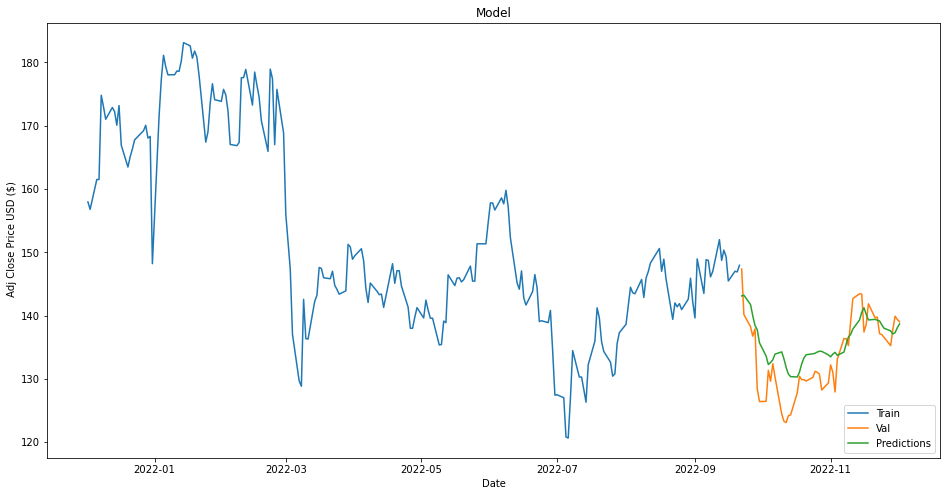

In [130]:
data_v = automotive_data.filter(['VOW3.DE'])
train_v = data_v[:training_data_len_v]
validation_v = data_v[training_data_len_v:]
validation_v['Predictions'] = predictions_v
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel(' Adj Close Price USD ($)')
plt.plot(train_v)
plt.plot(validation_v)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## Creating Models on Miscellaneous Stocks

## Replacing NA values in Miscellaneous data with average values

In [131]:
misc_data[['CL=F']] = misc_data[['CL=F']].fillna(misc_data[['CL=F']].mean())
misc_data[['IFX.DE']] = misc_data[['IFX.DE']].fillna(misc_data[['IFX.DE']].mean())
misc_data[['KMX']] = misc_data[['KMX']].fillna(misc_data[['KMX']].mean())
misc_data[['LKQ']] = misc_data[['LKQ']].fillna(misc_data[['LKQ']].mean())
misc_data[['MGA']] = misc_data[['MGA']].fillna(misc_data[['MGA']].mean())
misc_data[['NXPI']] = misc_data[['NXPI']].fillna(misc_data[['NXPI']].mean())

## 'CL=F'

In [132]:
misc_prices_x = misc_data.filter(['CL=F'])
values_x = misc_prices_x.values
training_data_len_x = math.ceil(len(values_x)* 0.8)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaled_data_x = scaler_x.fit_transform(values_x.reshape(-1,1))
train_data_x = scaled_data_x[0: training_data_len_x, :]

x_train_x = []
y_train_x = []

for i in range(60, len(train_data_x)):
    x_train_x.append(train_data_x[i-60:i, 0])
    y_train_x.append(train_data_x[i, 0])
    
x_train_x, y_train_x = np.array(x_train_x), np.array(y_train_x)
x_train_x = np.reshape(x_train_x, (x_train_x.shape[0], x_train_x.shape[1], 1))

In [133]:
test_data_x = scaled_data_x[training_data_len_x-60: , : ]
x_test_x= []
y_test_x = values_x[training_data_len_x:]

for i in range(60, len(test_data_x)):
    x_test_x.append(test_data_x[i-60:i, 0])

x_test_x = np.array(x_test_x)
x_test_x = np.reshape(x_test_x, (x_test_x.shape[0], x_test_x.shape[1], 1))

In [134]:
model_x = keras.Sequential()
model_x.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_x.shape[1], 1)))
model_x.add(layers.LSTM(100, return_sequences=False))
model_x.add(layers.Dense(25))
model_x.add(layers.Dense(1))
model_x.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_33 (LSTM)              (None, 100)               80400     
                                                                 
 dense_32 (Dense)            (None, 25)                2525      
                                                                 
 dense_33 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [135]:
model_x.compile(optimizer='adam', loss='mean_squared_error')
model_x.fit(x_train_x, y_train_x, batch_size= 1, epochs=3)

Epoch 1/3
149/149 [==============================] - 14s 33ms/step - loss: 0.0234
Epoch 2/3
149/149 [==============================] - 6s 42ms/step - loss: 0.0163
Epoch 3/3
149/149 [==============================] - 7s 49ms/step - loss: 0.0152


In [136]:
predictions_x= model_x.predict(x_test_x)
predictions_x = scaler_x.inverse_transform(predictions_x)

2/2 [==============================] - 1s 53ms/step


In [137]:
rmse_x = np.sqrt(np.mean(predictions_x- y_test_x)**2)
rmse_x

2.653269944346107

C:\Users\jai\AppData\Local\Temp\ipykernel_30944\4053215342.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_x['Predictions'] = predictions_x


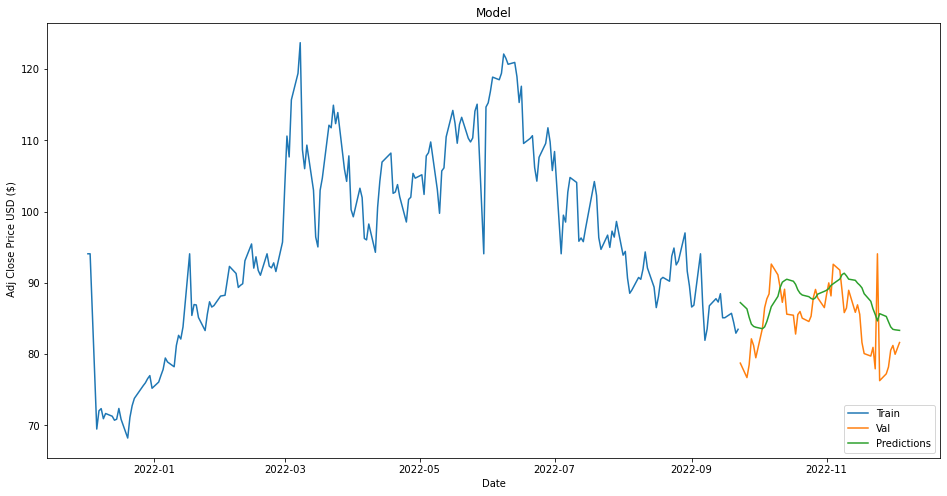

In [138]:
data_x = misc_data.filter(['CL=F'])
train_x = data_x[:training_data_len_x]
validation_x = data_x[training_data_len_x:]
validation_x['Predictions'] = predictions_x
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel(' Adj Close Price USD ($)')
plt.plot(train_x)
plt.plot(validation_x)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## 'IFX.DE'

In [139]:
misc_prices_I = misc_data.filter(['IFX.DE'])
values_I = misc_prices_I.values
training_data_len_I = math.ceil(len(values_I)* 0.8)

scaler_I = MinMaxScaler(feature_range=(0,1))
scaled_data_I = scaler_I.fit_transform(values_I.reshape(-1,1))
train_data_I = scaled_data_I[0: training_data_len_I, :]

x_train_I = []
y_train_I = []

for i in range(60, len(train_data_I)):
    x_train_I.append(train_data_I[i-60:i, 0])
    y_train_I.append(train_data_I[i, 0])
    
x_train_I, y_train_I = np.array(x_train_I), np.array(y_train_I)
x_train_I = np.reshape(x_train_I, (x_train_I.shape[0], x_train_I.shape[1], 1))

In [140]:
test_data_I = scaled_data_I[training_data_len_I-60: , : ]
x_test_I= []
y_test_I = values_I[training_data_len_I:]

for i in range(60, len(test_data_I)):
    x_test_I.append(test_data_I[i-60:i, 0])

x_test_I = np.array(x_test_I)
x_test_I = np.reshape(x_test_I, (x_test_I.shape[0], x_test_I.shape[1], 1))

In [141]:
model_I = keras.Sequential()
model_I.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_I.shape[1], 1)))
model_I.add(layers.LSTM(100, return_sequences=False))
model_I.add(layers.Dense(25))
model_I.add(layers.Dense(1))
model_I.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_35 (LSTM)              (None, 100)               80400     
                                                                 
 dense_34 (Dense)            (None, 25)                2525      
                                                                 
 dense_35 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [142]:
model_I.compile(optimizer='adam', loss='mean_squared_error')
model_I.fit(x_train_I, y_train_I, batch_size= 1, epochs=3)

Epoch 1/3
149/149 [==============================] - 14s 46ms/step - loss: 0.0078
Epoch 2/3
149/149 [==============================] - 5s 31ms/step - loss: 0.0045
Epoch 3/3
149/149 [==============================] - 7s 49ms/step - loss: 0.0039


In [143]:
predictions_I= model_I.predict(x_test_I)
predictions_I = scaler_I.inverse_transform(predictions_I)

2/2 [==============================] - 2s 75ms/step


In [144]:
rmse_I = np.sqrt(np.mean(predictions_I- y_test_I)**2)
rmse_I

0.999953811340696

C:\Users\jai\AppData\Local\Temp\ipykernel_30944\2968055409.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_I['Predictions'] = predictions_I


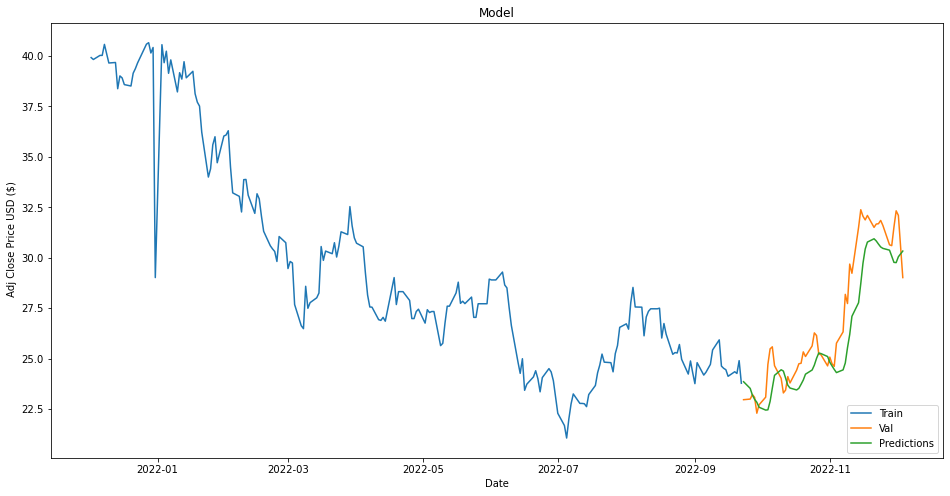

In [145]:
data_I = misc_data.filter(['IFX.DE'])
train_I = data_I[:training_data_len_I]
validation_I = data_I[training_data_len_I:]
validation_I['Predictions'] = predictions_I
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel(' Adj Close Price USD ($)')
plt.plot(train_I)
plt.plot(validation_I)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## 'KMX'

In [146]:
misc_prices_k = misc_data.filter(['KMX'])
values_k = misc_prices_k.values
training_data_len_k = math.ceil(len(values_k)* 0.8)

scaler_k = MinMaxScaler(feature_range=(0,1))
scaled_data_k = scaler_k.fit_transform(values_k.reshape(-1,1))
train_data_k = scaled_data_k[0: training_data_len_k, :]

x_train_k = []
y_train_k = []

for i in range(60, len(train_data_k)):
    x_train_k.append(train_data_k[i-60:i, 0])
    y_train_k.append(train_data_k[i, 0])
    
x_train_k, y_train_k = np.array(x_train_k), np.array(y_train_k)
x_train_k = np.reshape(x_train_k, (x_train_k.shape[0], x_train_k.shape[1], 1))

In [147]:
test_data_k = scaled_data_k[training_data_len_k-60: , : ]
x_test_k= []
y_test_k = values_k[training_data_len_k:]

for i in range(60, len(test_data_k)):
    x_test_k.append(test_data_k[i-60:i, 0])

x_test_k = np.array(x_test_k)
x_test_k = np.reshape(x_test_k, (x_test_k.shape[0], x_test_k.shape[1], 1))

In [148]:
model_k = keras.Sequential()
model_k.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_k.shape[1], 1)))
model_k.add(layers.LSTM(100, return_sequences=False))
model_k.add(layers.Dense(25))
model_k.add(layers.Dense(1))
model_k.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_37 (LSTM)              (None, 100)               80400     
                                                                 
 dense_36 (Dense)            (None, 25)                2525      
                                                                 
 dense_37 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [149]:
model_k.compile(optimizer='adam', loss='mean_squared_error')
model_k.fit(x_train_k, y_train_k, batch_size= 1, epochs=3)

Epoch 1/3
149/149 [==============================] - 14s 48ms/step - loss: 0.0047
Epoch 2/3
149/149 [==============================] - 4s 29ms/step - loss: 0.0026
Epoch 3/3
149/149 [==============================] - 7s 47ms/step - loss: 0.0027


In [150]:
predictions_k= model_k.predict(x_test_k)
predictions_k = scaler_k.inverse_transform(predictions_k)

2/2 [==============================] - 2s 25ms/step


In [151]:
rmse_k = np.sqrt(np.mean(predictions_k- y_test_k)**2)
rmse_k

7.732412243937399

C:\Users\jai\AppData\Local\Temp\ipykernel_30944\934599915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_k['Predictions'] = predictions_k


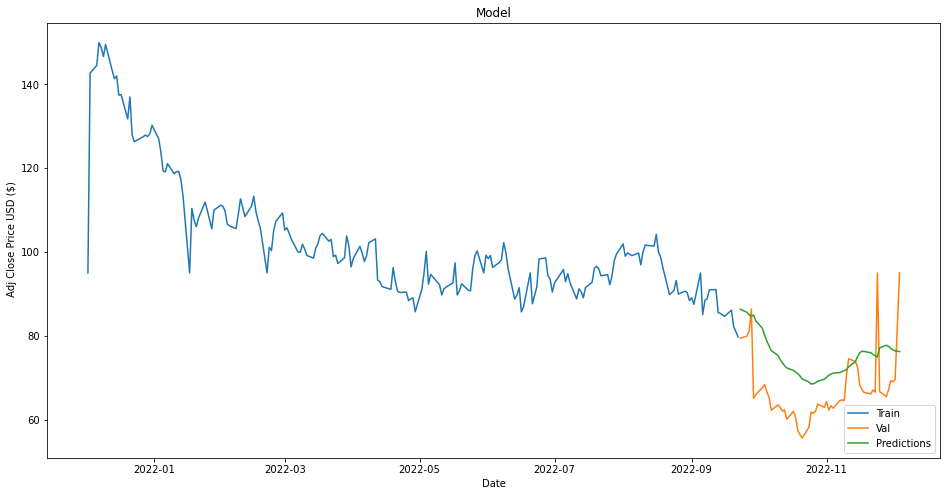

In [152]:
data_k = misc_data.filter(['KMX'])
train_k = data_k[:training_data_len_k]
validation_k = data_k[training_data_len_k:]
validation_k['Predictions'] = predictions_k
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel(' Adj Close Price USD ($)')
plt.plot(train_k)
plt.plot(validation_k)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## 'LKQ'

In [153]:
misc_prices_l = misc_data.filter(['LKQ'])
values_l = misc_prices_l.values
training_data_len_l = math.ceil(len(values_l)* 0.8)

scaler_l = MinMaxScaler(feature_range=(0,1))
scaled_data_l = scaler_l.fit_transform(values_l.reshape(-1,1))
train_data_l = scaled_data_l[0: training_data_len_l, :]

x_train_l = []
y_train_l = []

for i in range(60, len(train_data_l)):
    x_train_l.append(train_data_l[i-60:i, 0])
    y_train_l.append(train_data_l[i, 0])
    
x_train_l, y_train_l = np.array(x_train_l), np.array(y_train_l)
x_train_l = np.reshape(x_train_l, (x_train_l.shape[0], x_train_l.shape[1], 1))

In [154]:
test_data_l = scaled_data_l[training_data_len_l-60: , : ]
x_test_l= []
y_test_l = values_l[training_data_len_l:]

for i in range(60, len(test_data_l)):
    x_test_l.append(test_data_l[i-60:i, 0])

x_test_l = np.array(x_test_l)
x_test_l = np.reshape(x_test_l, (x_test_l.shape[0], x_test_l.shape[1], 1))

In [155]:
model_l = keras.Sequential()
model_l.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_l.shape[1], 1)))
model_l.add(layers.LSTM(100, return_sequences=False))
model_l.add(layers.Dense(25))
model_l.add(layers.Dense(1))
model_l.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_39 (LSTM)              (None, 100)               80400     
                                                                 
 dense_38 (Dense)            (None, 25)                2525      
                                                                 
 dense_39 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [156]:
model_l.compile(optimizer='adam', loss='mean_squared_error')
model_l.fit(x_train_l, y_train_l, batch_size= 1, epochs=3)

Epoch 1/3
149/149 [==============================] - 15s 50ms/step - loss: 0.0252
Epoch 2/3
149/149 [==============================] - 5s 35ms/step - loss: 0.0102
Epoch 3/3
149/149 [==============================] - 6s 41ms/step - loss: 0.0086


In [157]:
predictions_l = model_l.predict(x_test_l)
predictions_l = scaler_l.inverse_transform(predictions_l)

2/2 [==============================] - 4s 61ms/step


In [158]:
rmse_l = np.sqrt(np.mean(predictions_l- y_test_l)**2)
rmse_l

0.5875903078342387

C:\Users\jai\AppData\Local\Temp\ipykernel_30944\2819461675.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_l['Predictions'] = predictions_l


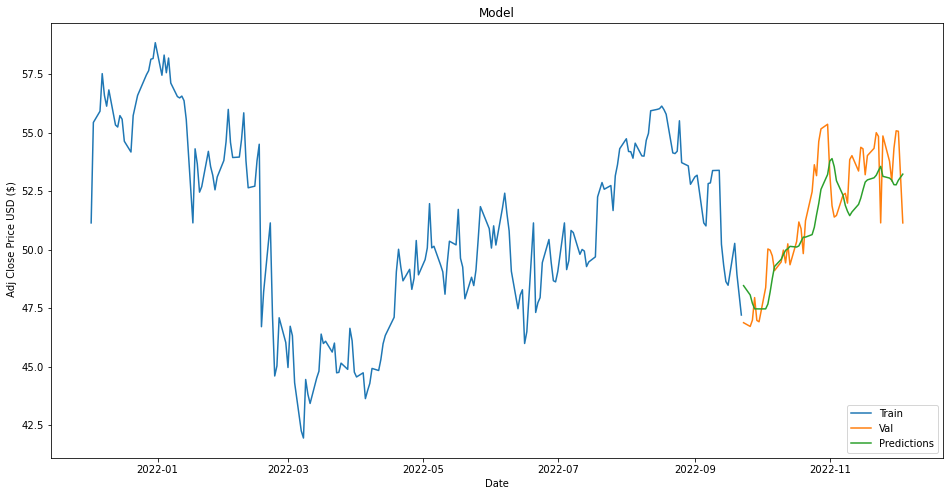

In [159]:
data_l = misc_data.filter(['LKQ'])
train_l = data_l[:training_data_len_l]
validation_l = data_l[training_data_len_l:]
validation_l['Predictions'] = predictions_l
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel(' Adj Close Price USD ($)')
plt.plot(train_l)
plt.plot(validation_l)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## 'MGA'

In [160]:
misc_prices_m = misc_data.filter(['MGA'])
values_m = misc_prices_m.values
training_data_len_m = math.ceil(len(values_m)* 0.8)

scaler_m = MinMaxScaler(feature_range=(0,1))
scaled_data_m = scaler_m.fit_transform(values_m.reshape(-1,1))
train_data_m = scaled_data_m[0: training_data_len_m, :]

x_train_m = []
y_train_m = []

for i in range(60, len(train_data_m)):
    x_train_m.append(train_data_m[i-60:i, 0])
    y_train_m.append(train_data_m[i, 0])
    
x_train_m, y_train_m = np.array(x_train_m), np.array(y_train_m)
x_train_m = np.reshape(x_train_m, (x_train_m.shape[0], x_train_m.shape[1], 1))

In [161]:
test_data_m = scaled_data_m[training_data_len_m-60: , : ]
x_test_m= []
y_test_m = values_m[training_data_len_m:]

for i in range(60, len(test_data_m)):
    x_test_m.append(test_data_m[i-60:i, 0])

x_test_m = np.array(x_test_m)
x_test_m = np.reshape(x_test_m, (x_test_m.shape[0], x_test_m.shape[1], 1))

In [162]:
model_m = keras.Sequential()
model_m.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_m.shape[1], 1)))
model_m.add(layers.LSTM(100, return_sequences=False))
model_m.add(layers.Dense(25))
model_m.add(layers.Dense(1))
model_m.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_41 (LSTM)              (None, 100)               80400     
                                                                 
 dense_40 (Dense)            (None, 25)                2525      
                                                                 
 dense_41 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [163]:
model_m.compile(optimizer='adam', loss='mean_squared_error')
model_m.fit(x_train_m, y_train_m, batch_size= 1, epochs=3)

Epoch 1/3
149/149 [==============================] - 13s 49ms/step - loss: 0.0097
Epoch 2/3
149/149 [==============================] - 6s 40ms/step - loss: 0.0068
Epoch 3/3
149/149 [==============================] - 5s 35ms/step - loss: 0.0057


In [164]:
predictions_m = model_m.predict(x_test_m)
predictions_m = scaler_m.inverse_transform(predictions_m)

2/2 [==============================] - 2s 46ms/step


In [165]:
rmse_m = np.sqrt(np.mean(predictions_m- y_test_m)**2)
rmse_m

1.07938041384258

C:\Users\jai\AppData\Local\Temp\ipykernel_30944\3162365971.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_m['Predictions'] = predictions_m


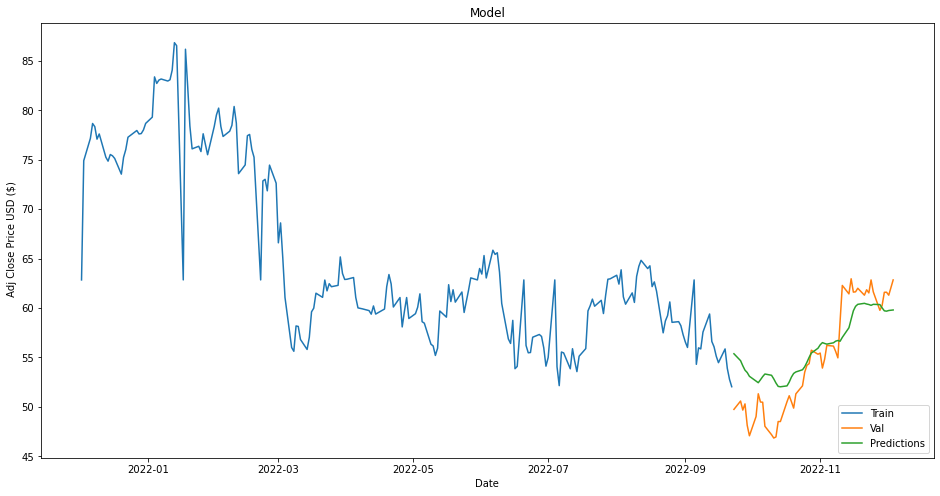

In [166]:
data_m = misc_data.filter(['MGA'])
train_m = data_m[:training_data_len_m]
validation_m = data_m[training_data_len_m:]
validation_m['Predictions'] = predictions_m
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel(' Adj Close Price USD ($)')
plt.plot(train_m)
plt.plot(validation_m)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## 'NXPI'

In [167]:
misc_prices_n = misc_data.filter(['NXPI'])
values_n = misc_prices_n.values
training_data_len_n = math.ceil(len(values_n)* 0.8)

scaler_n = MinMaxScaler(feature_range=(0,1))
scaled_data_n = scaler_n.fit_transform(values_n.reshape(-1,1))
train_data_n = scaled_data_n[0: training_data_len_n, :]

x_train_n = []
y_train_n = []

for i in range(60, len(train_data_n)):
    x_train_n.append(train_data_n[i-60:i, 0])
    y_train_n.append(train_data_n[i, 0])
    
x_train_n, y_train_n = np.array(x_train_n), np.array(y_train_n)
x_train_n = np.reshape(x_train_n, (x_train_n.shape[0], x_train_n.shape[1], 1))

In [168]:
test_data_n = scaled_data_n[training_data_len_n-60: , : ]
x_test_n= []
y_test_n = values_n[training_data_len_n:]

for i in range(60, len(test_data_n)):
    x_test_n.append(test_data_n[i-60:i, 0])

x_test_n = np.array(x_test_n)
x_test_n = np.reshape(x_test_n, (x_test_n.shape[0], x_test_n.shape[1], 1))

In [169]:
model_n = keras.Sequential()
model_n.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_n.shape[1], 1)))
model_n.add(layers.LSTM(100, return_sequences=False))
model_n.add(layers.Dense(25))
model_n.add(layers.Dense(1))
model_n.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_43 (LSTM)              (None, 100)               80400     
                                                                 
 dense_42 (Dense)            (None, 25)                2525      
                                                                 
 dense_43 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [170]:
model_n.compile(optimizer='adam', loss='mean_squared_error')
model_n.fit(x_train_n, y_train_n, batch_size= 1, epochs=3)

Epoch 1/3
149/149 [==============================] - 13s 39ms/step - loss: 0.0112
Epoch 2/3
149/149 [==============================] - 7s 50ms/step - loss: 0.0068
Epoch 3/3
149/149 [==============================] - 4s 28ms/step - loss: 0.0061


In [171]:
predictions_n = model_n.predict(x_test_n)
predictions_n = scaler_n.inverse_transform(predictions_n)

2/2 [==============================] - 2s 58ms/step


In [172]:
rmse_n = np.sqrt(np.mean(predictions_n- y_test_n)**2)
rmse_n

1.1927294352697948

C:\Users\jai\AppData\Local\Temp\ipykernel_30944\1063905658.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_n['Predictions'] = predictions_n


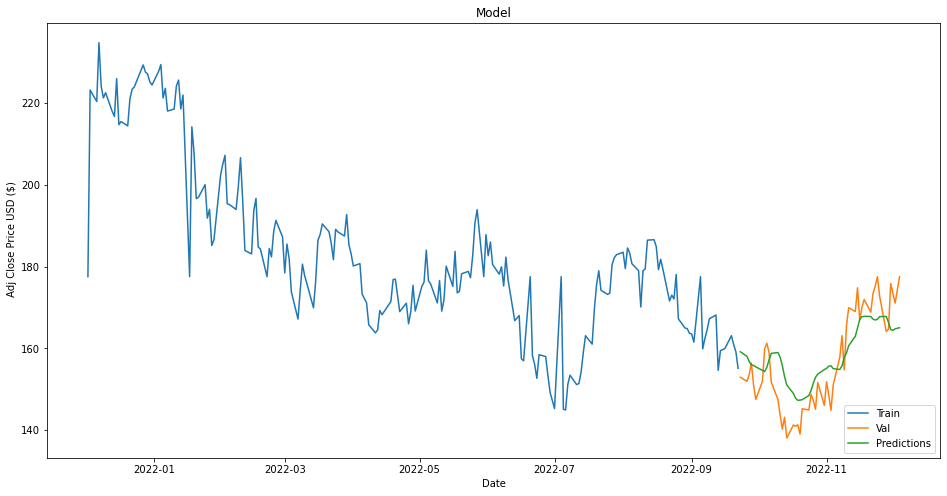

In [173]:
data_n = misc_data.filter(['NXPI'])
train_n = data_n[:training_data_len_n]
validation_n = data_n[training_data_len_n:]
validation_n['Predictions'] = predictions_n
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel(' Adj Close Price USD ($)')
plt.plot(train_n)
plt.plot(validation_n)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()